In [1]:
## Installing Library

!pip install sweetviz

In [2]:
## Importing libraries

import pandas as pd
import numpy as np
import sweetviz as sv

In [3]:
## Loading Data

# Data URL from UCI repository
auto_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# List of columns
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 
                'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 
                'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Reading data as pandas dataframe
df = pd.read_csv(auto_data_url, names=column_names)
df = df.replace({'?': np.nan})

In [4]:
## Converting columns to Numeric type
numeric_cols = ['normalized-losses', 'engine-size', 'horsepower', 'peak-rpm', 'bore', 'stroke', 'price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [5]:
## Generating EDA report (or Analyzing the dataframe)
my_report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [6]:
## Downloading and showing the generated EDA report as HTML in external tab

my_report.show_html(filepath='EDA_Report.html', 
                    open_browser=True, 
                    layout='widescreen', 
                    scale=None)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



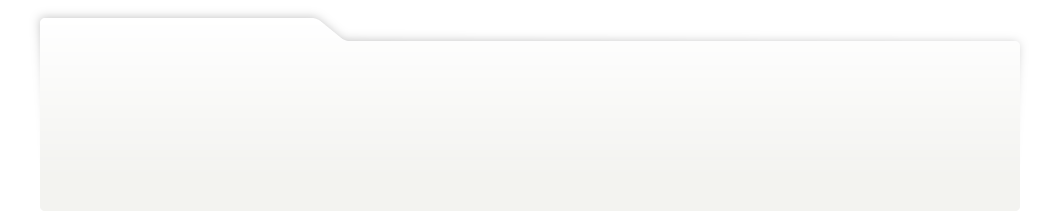
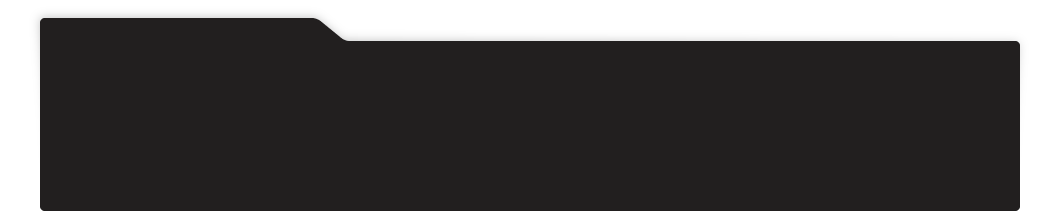
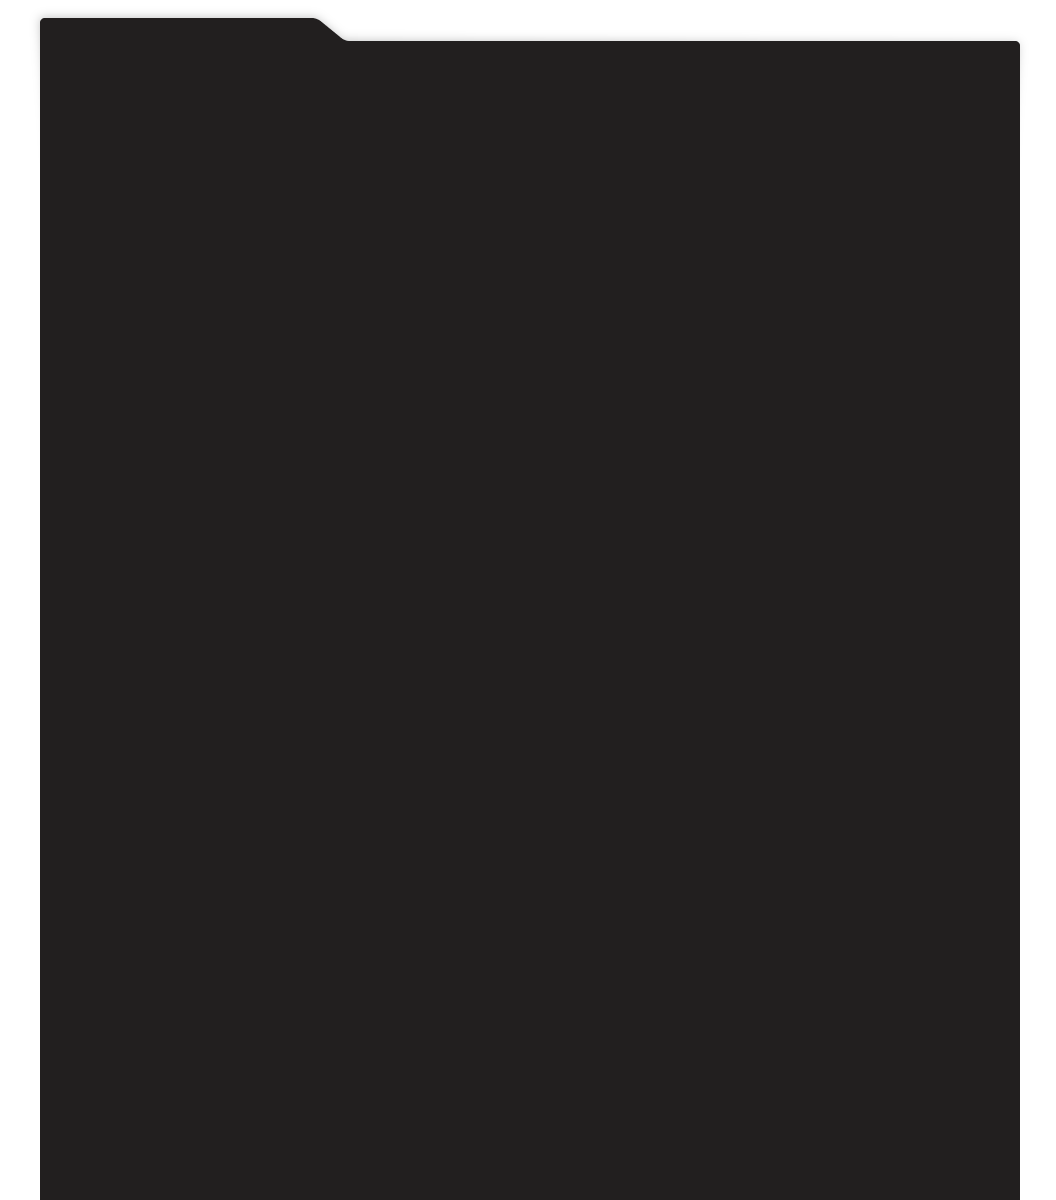
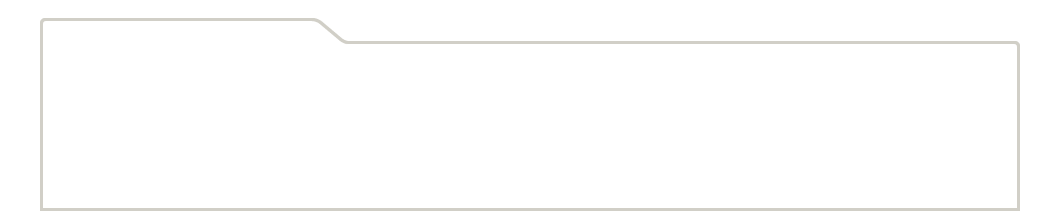
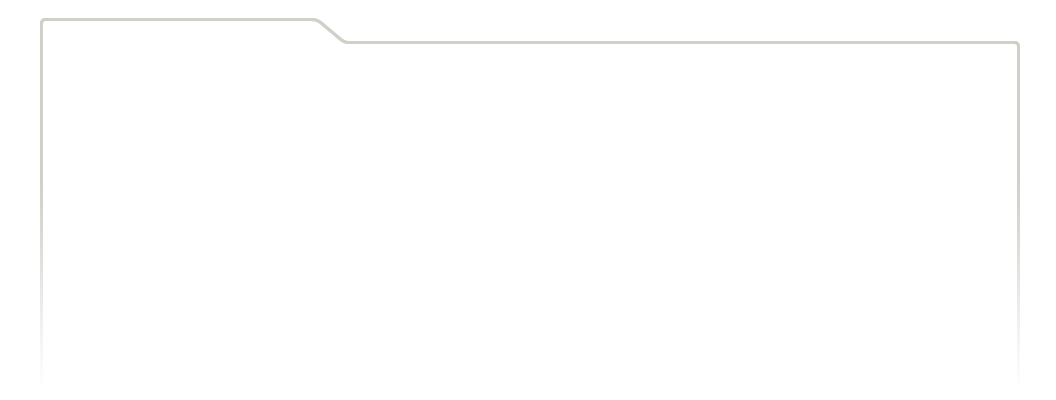
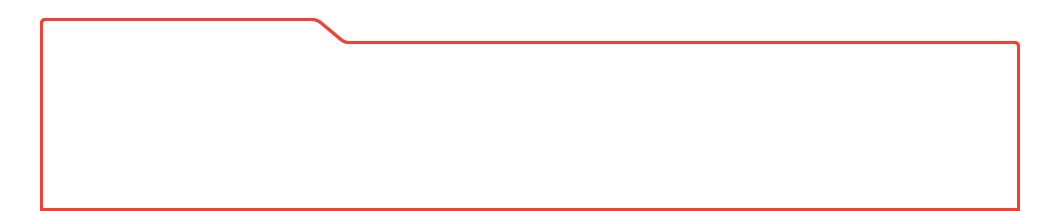
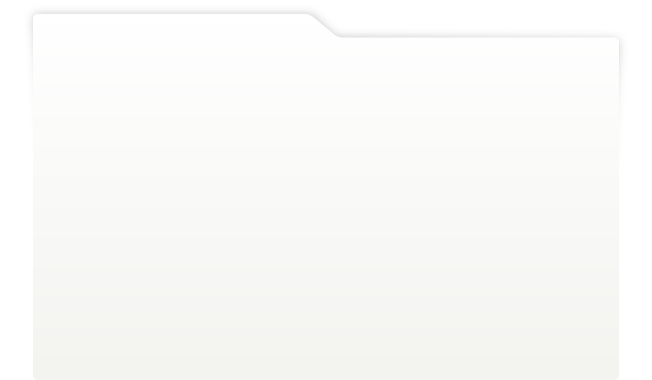
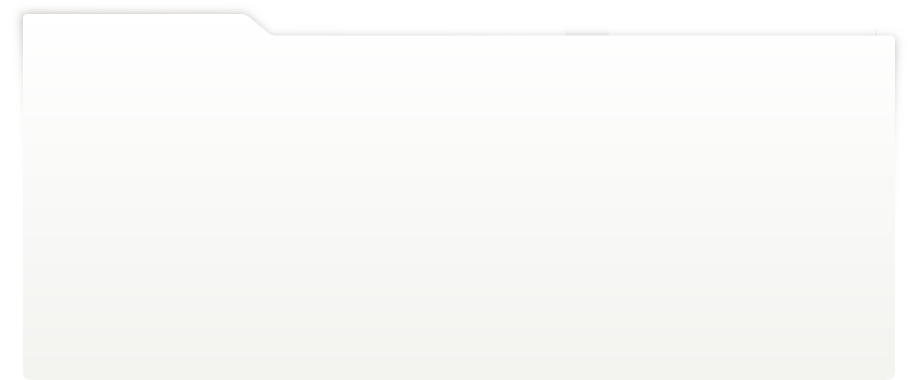
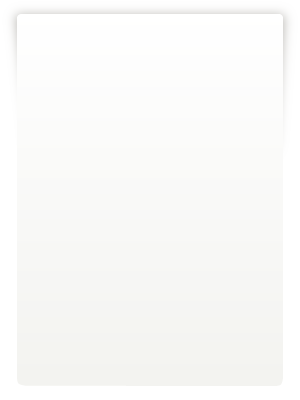
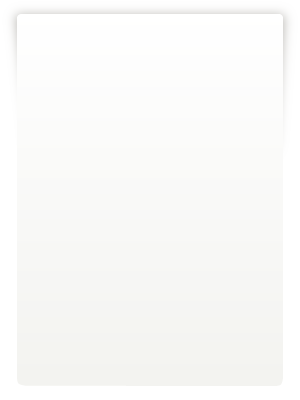
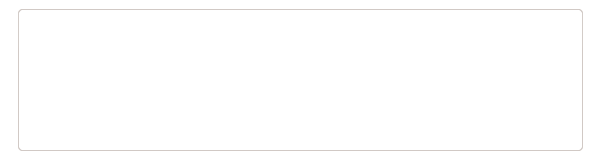
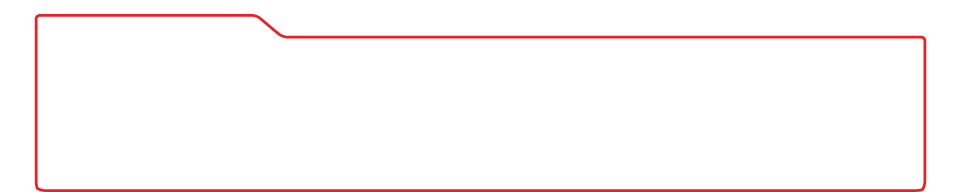
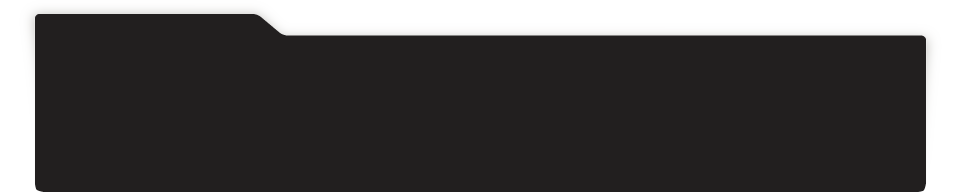
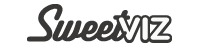
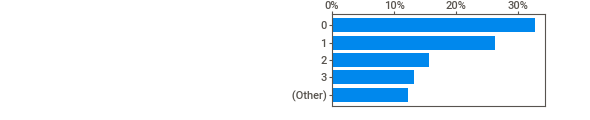
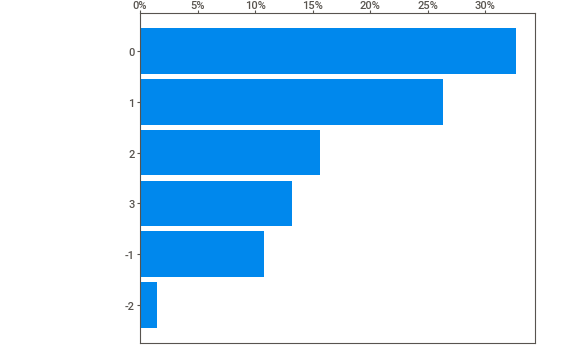
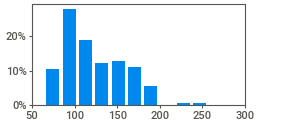
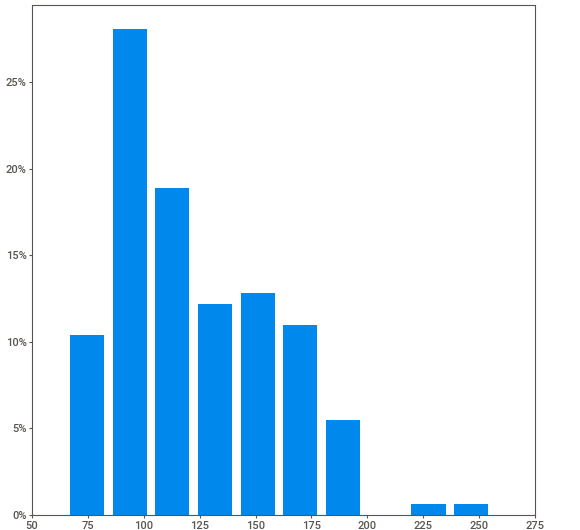
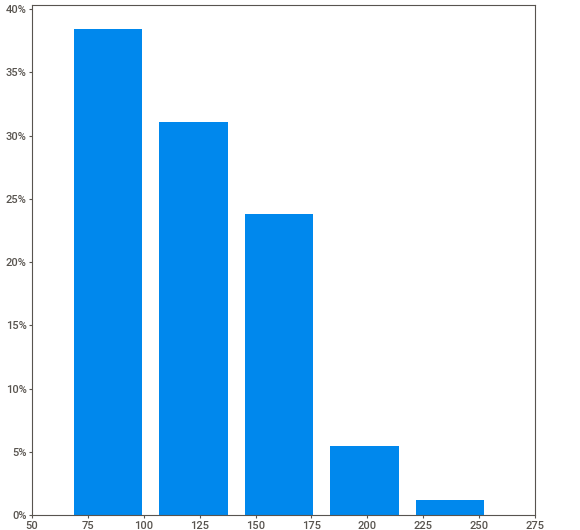
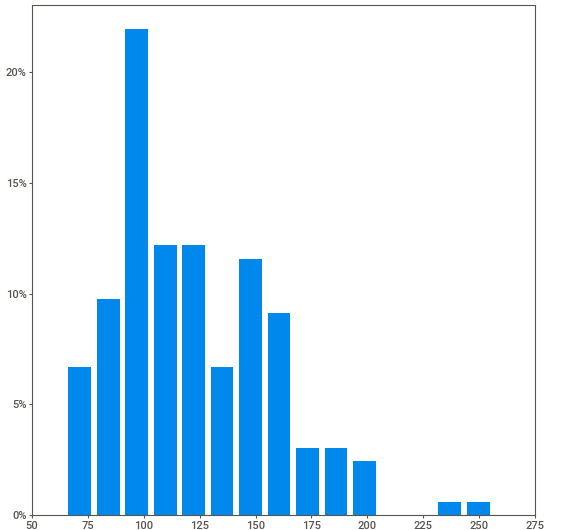
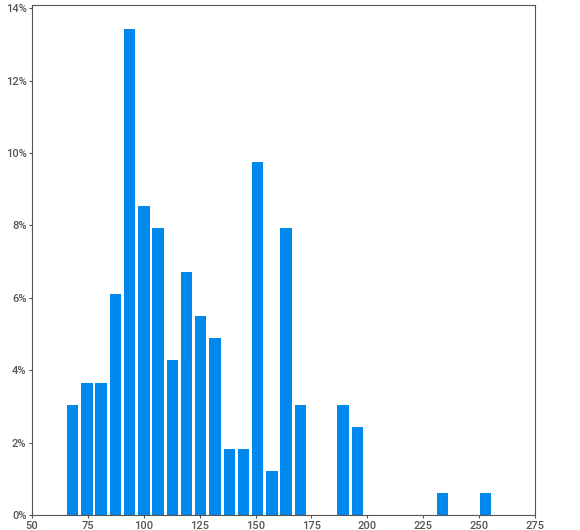
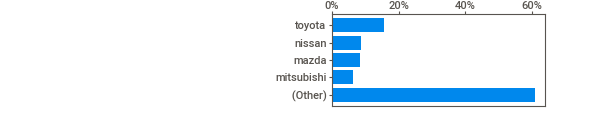
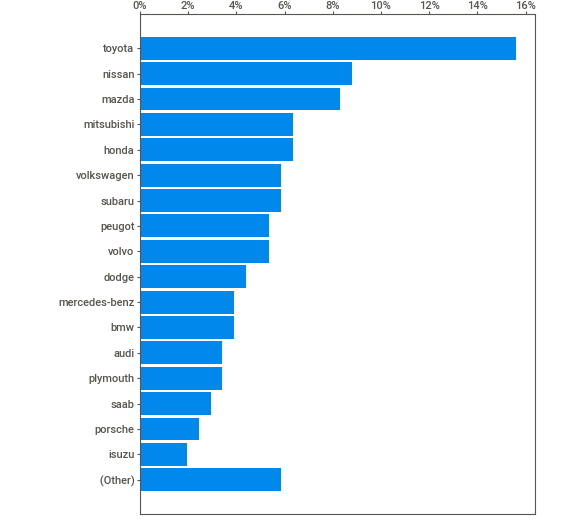
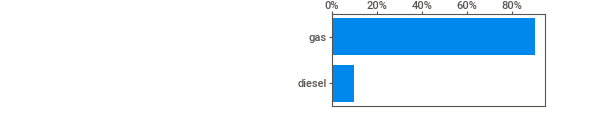
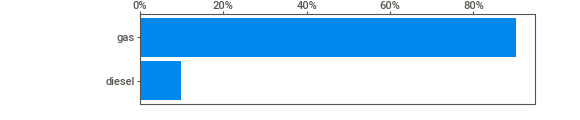
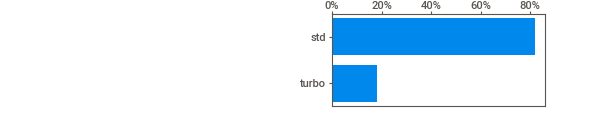
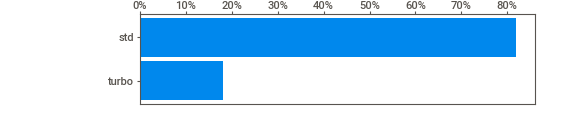
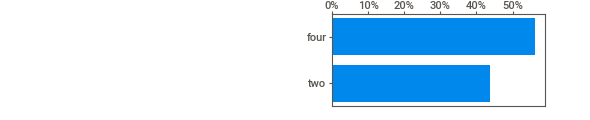
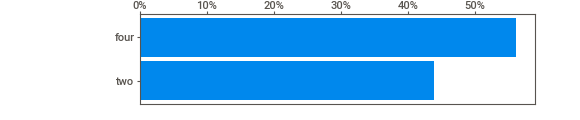
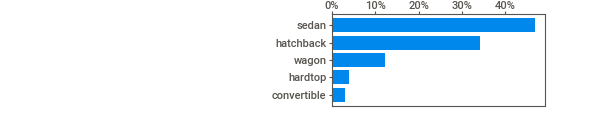
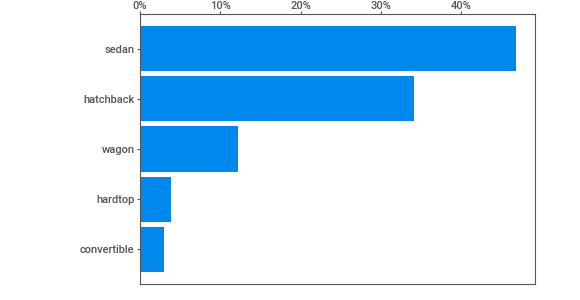
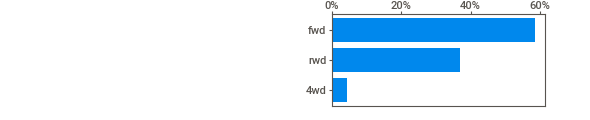
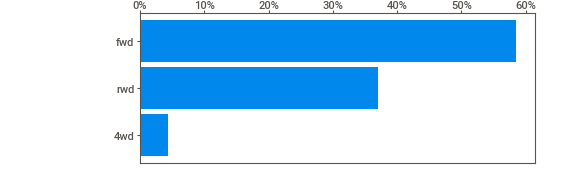
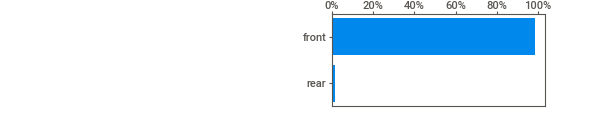
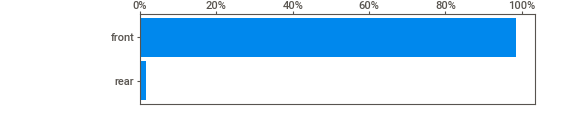
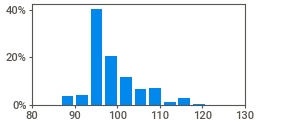
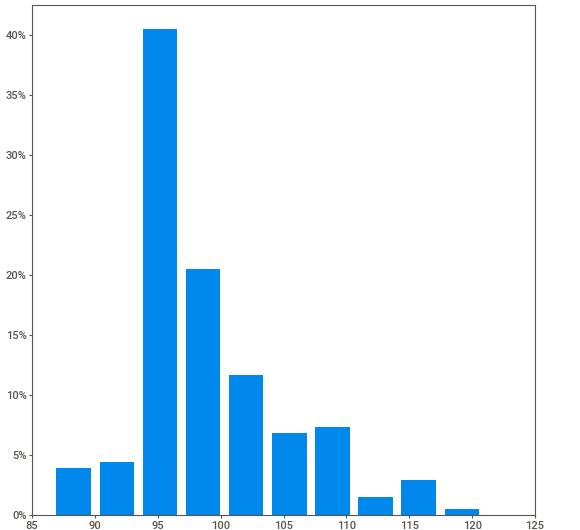
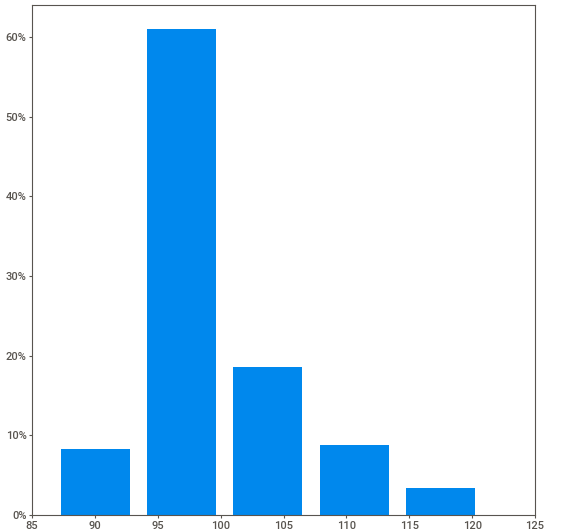
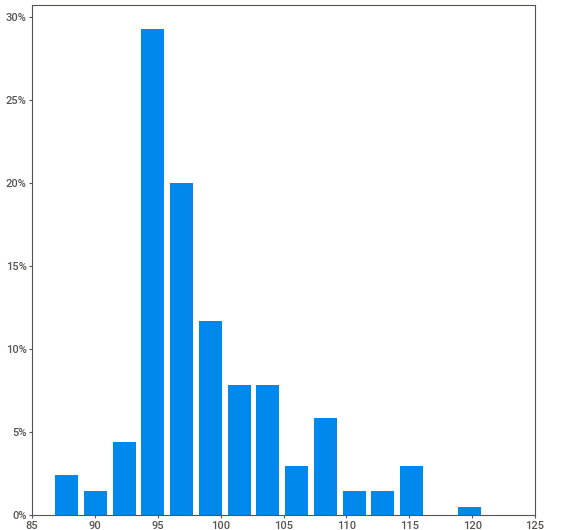
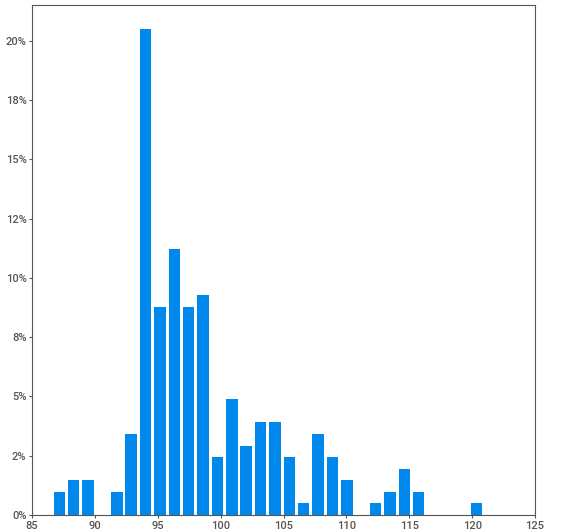
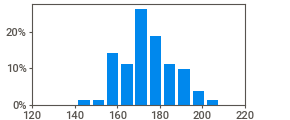
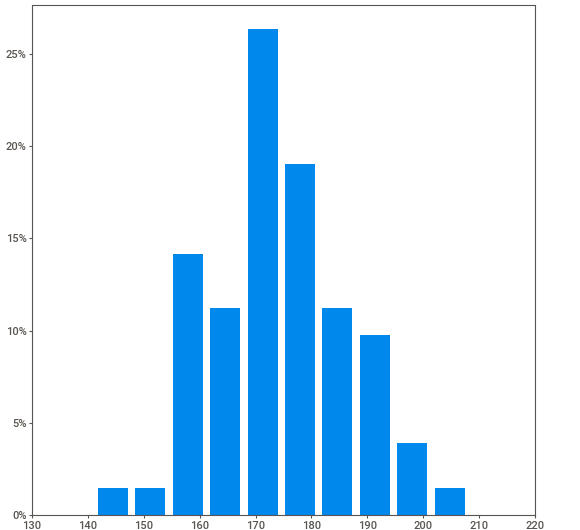
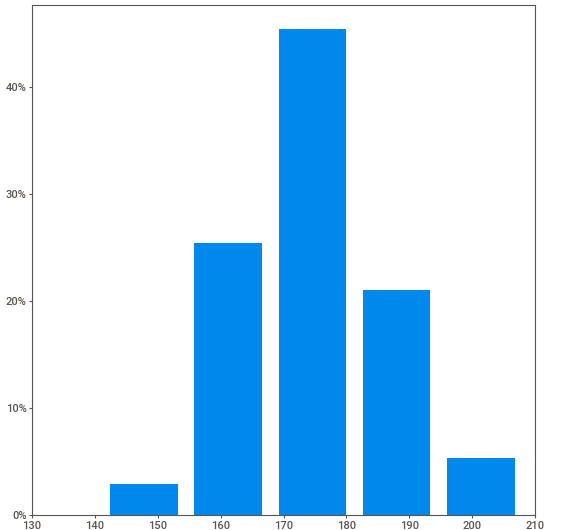
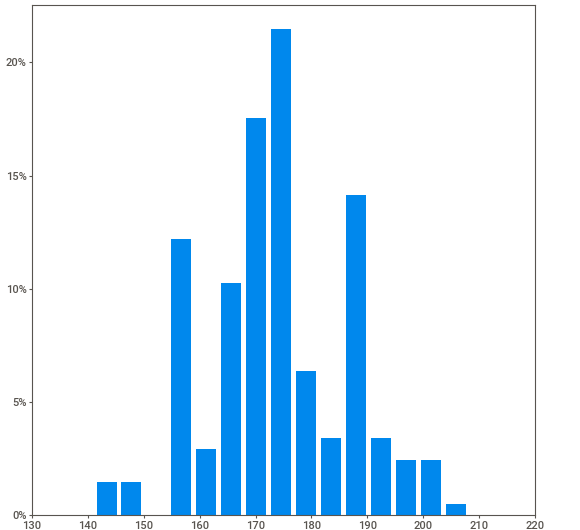
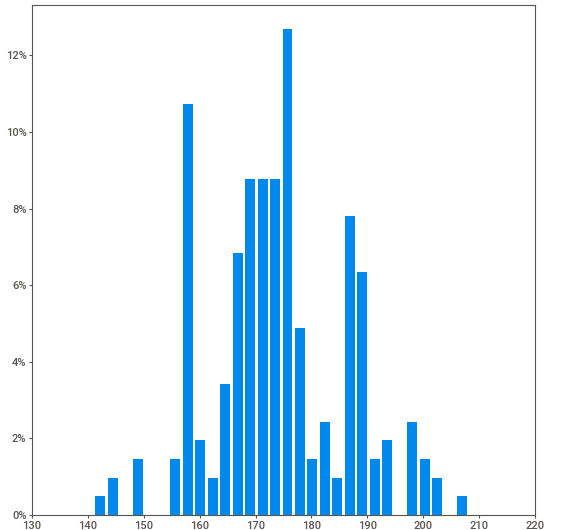
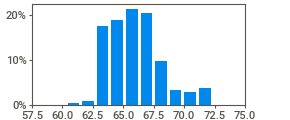
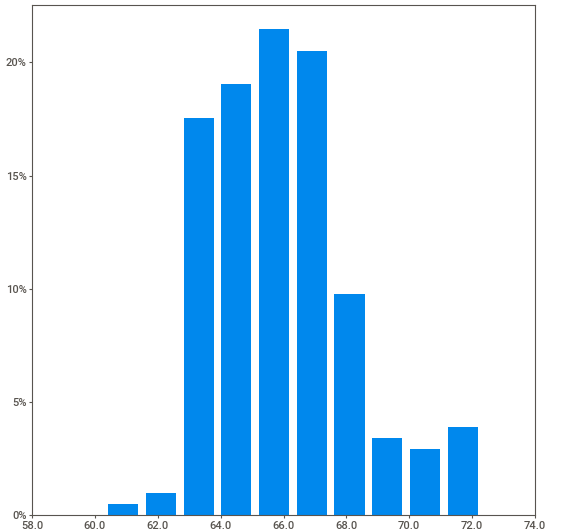
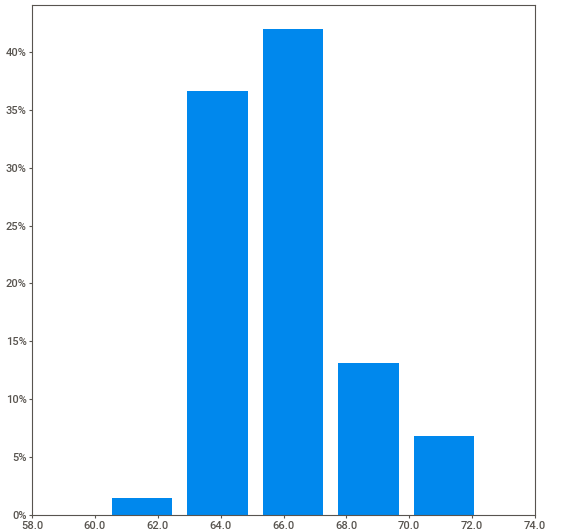
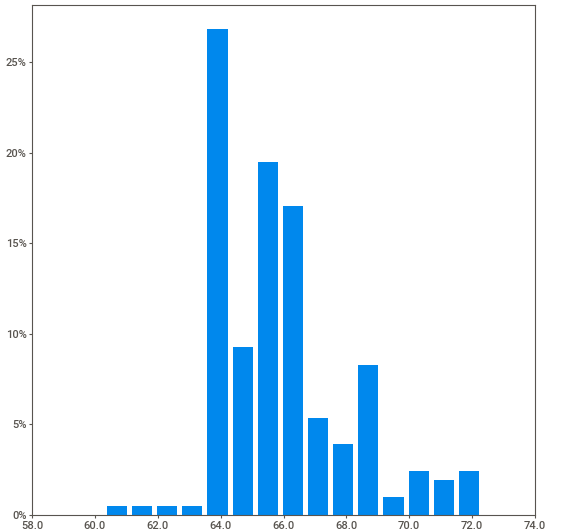
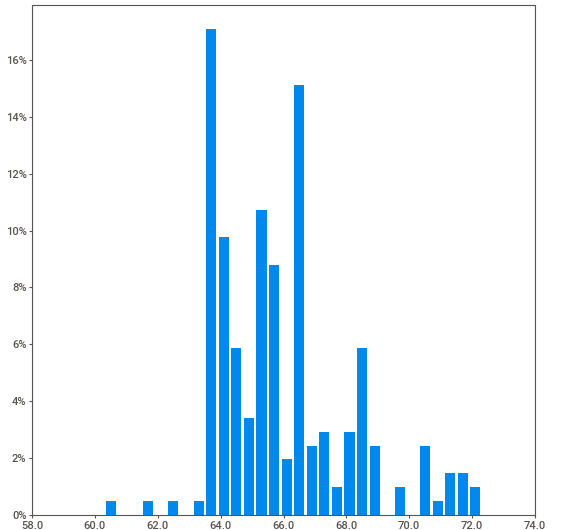
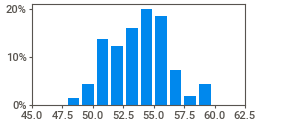
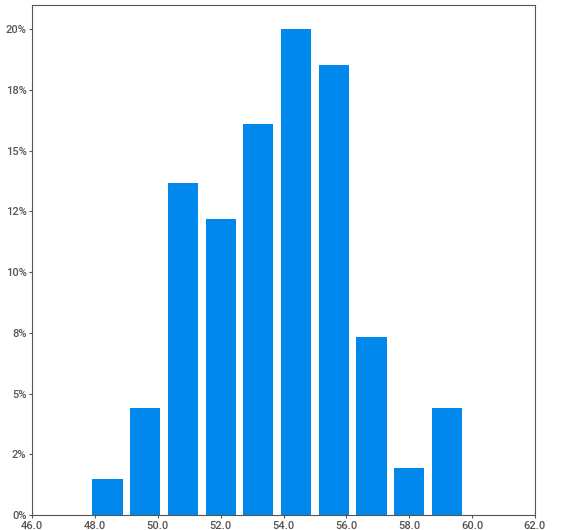
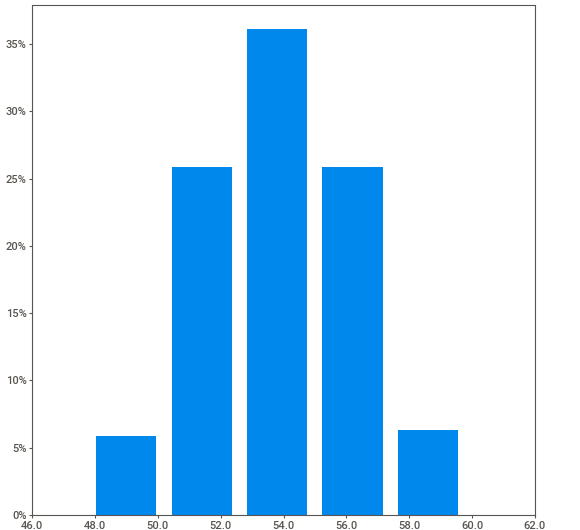
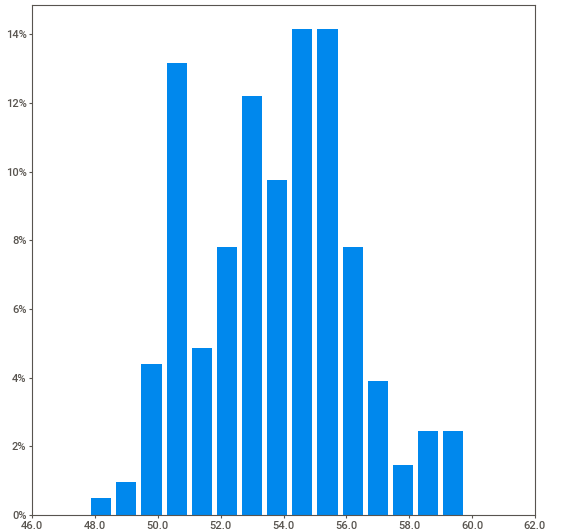
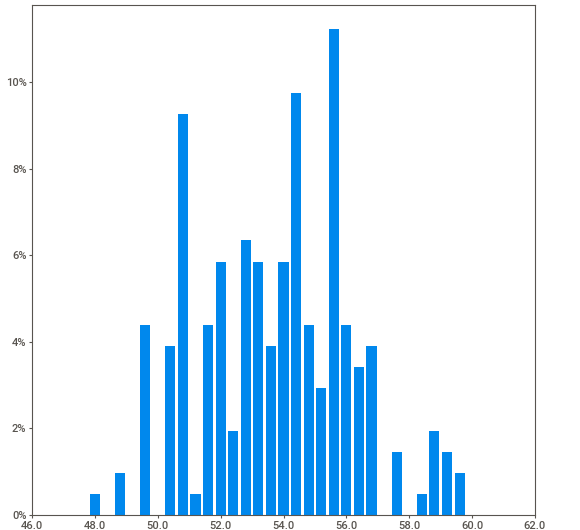
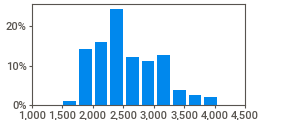
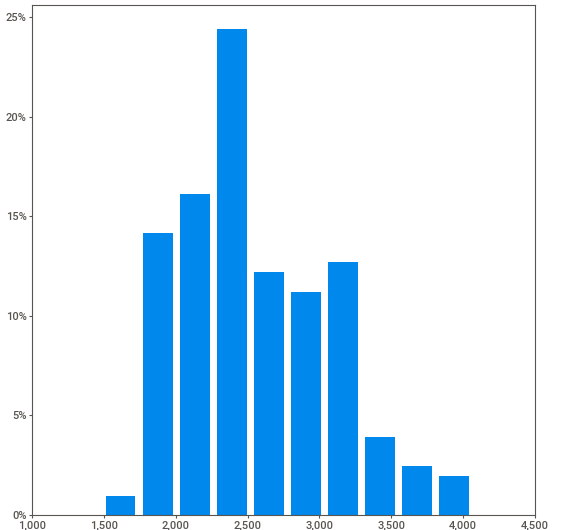
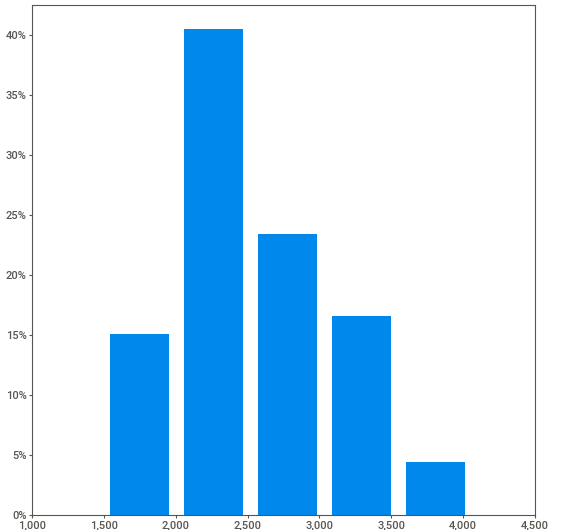
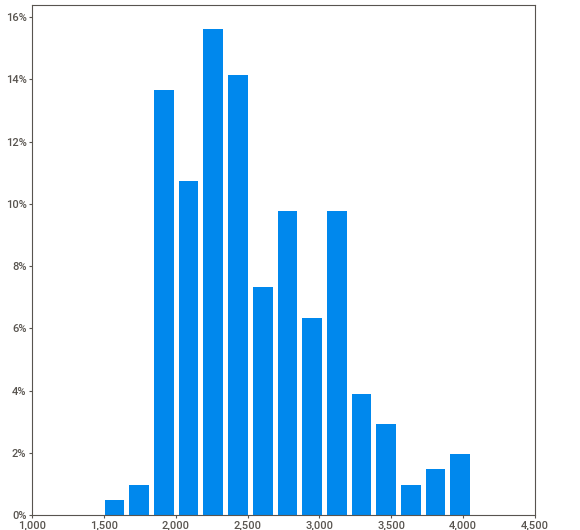
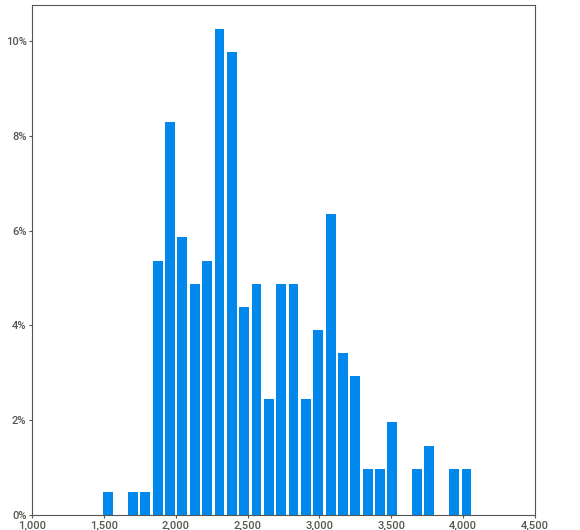
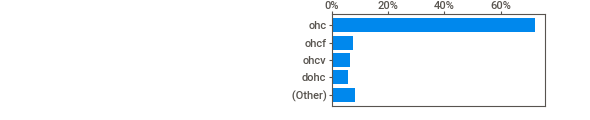
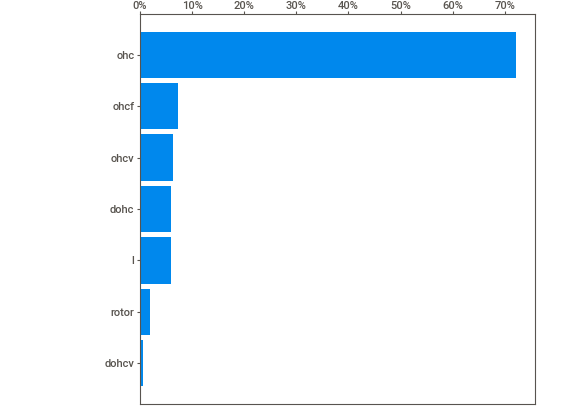
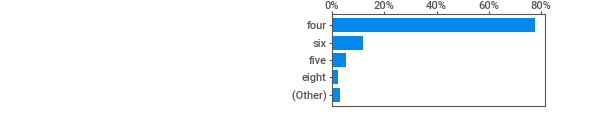
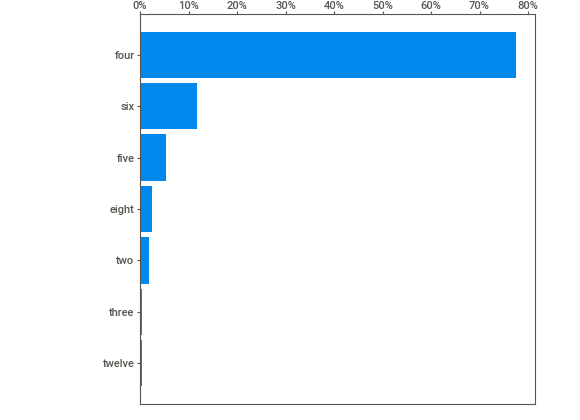
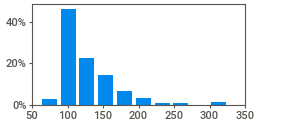
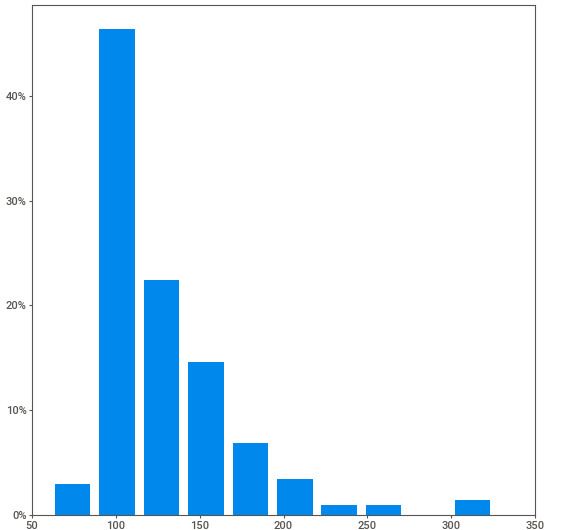
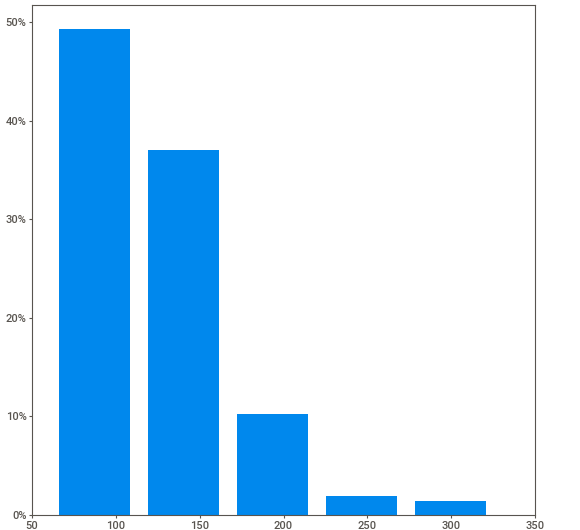
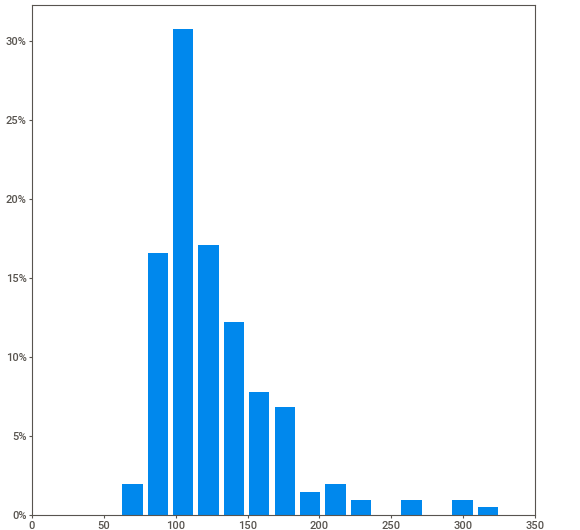
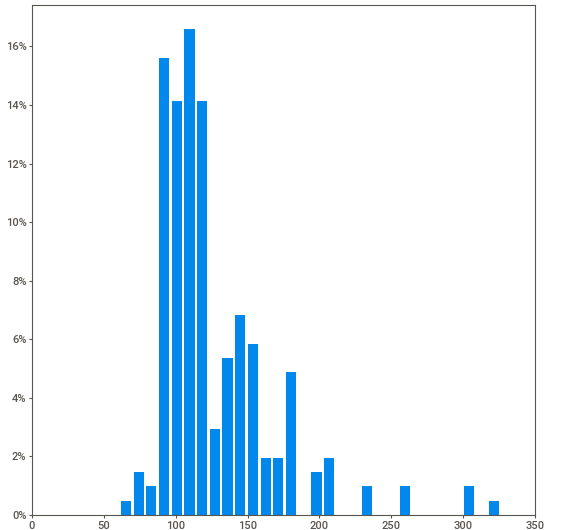
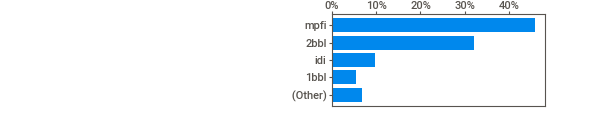
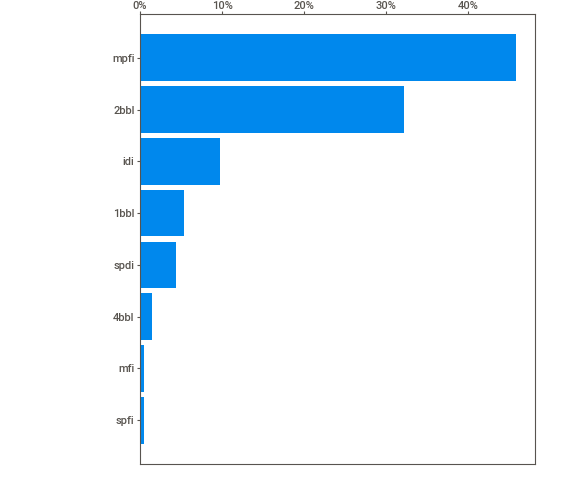
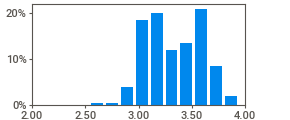
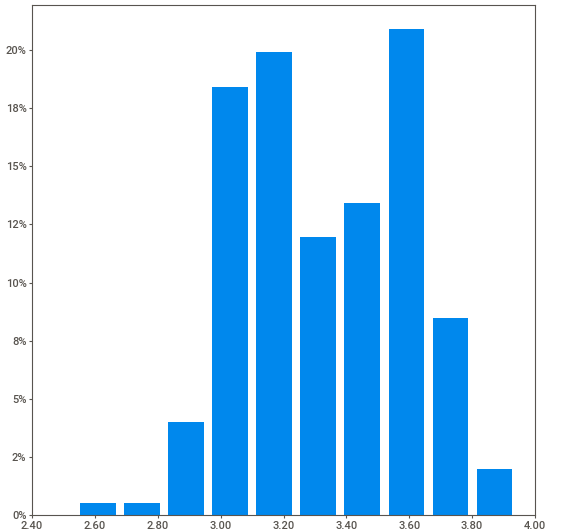
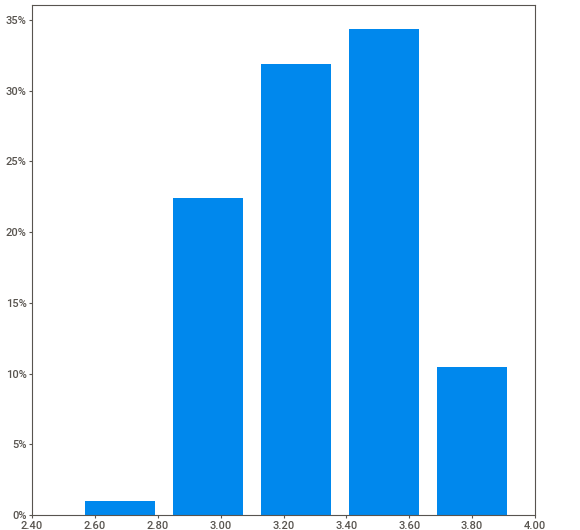
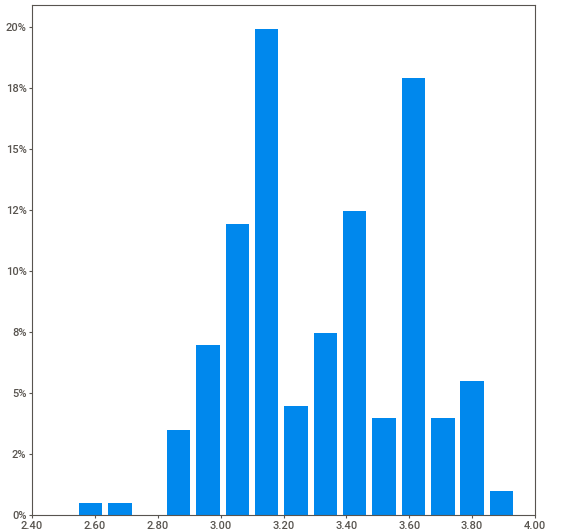
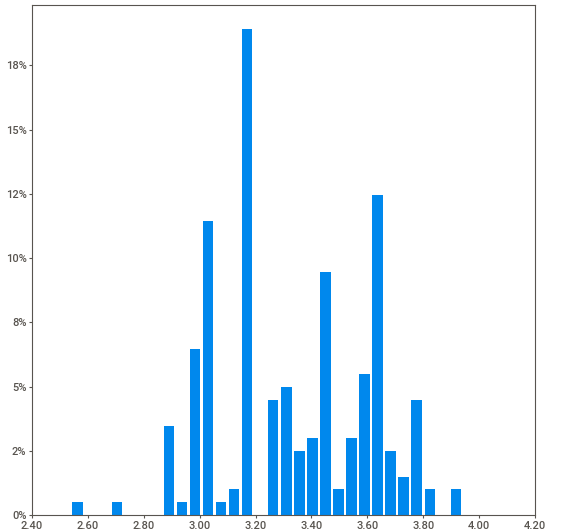
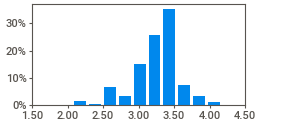
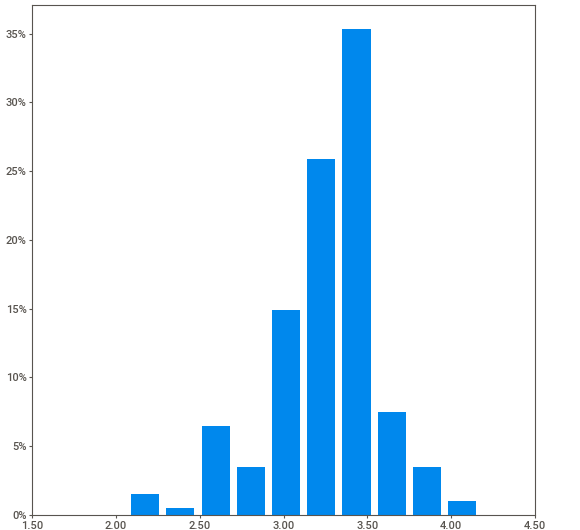
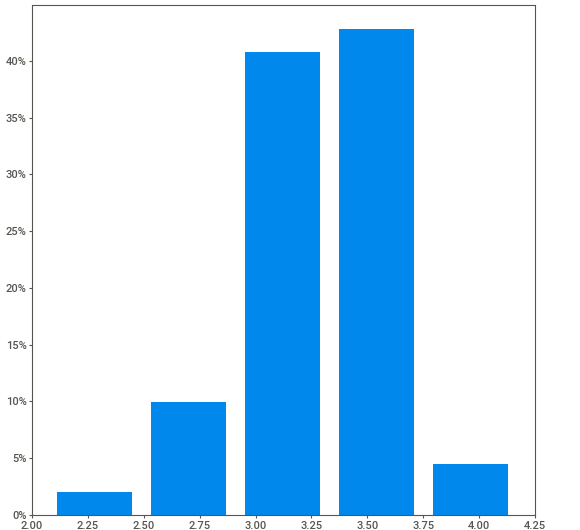
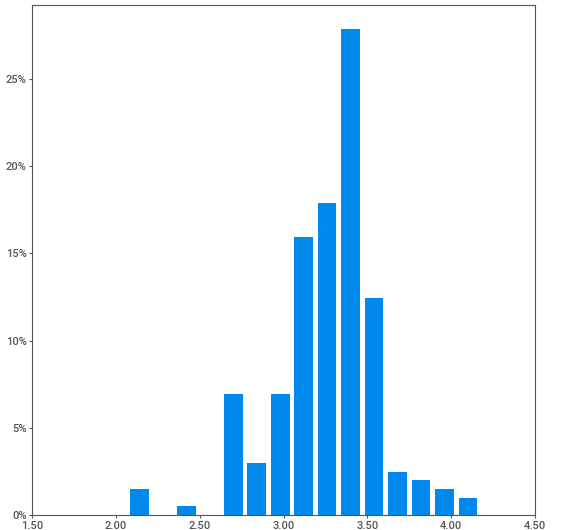
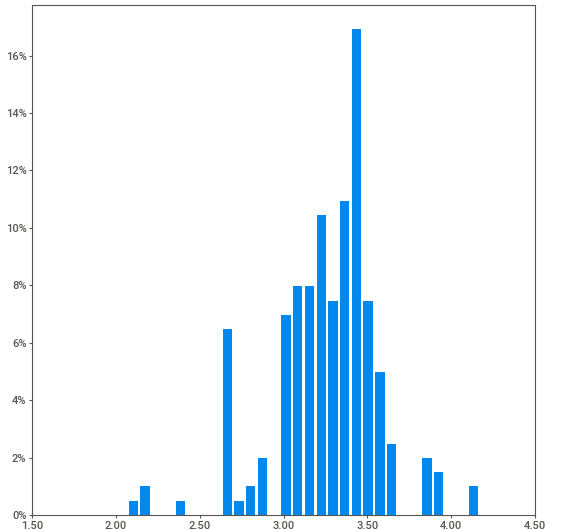
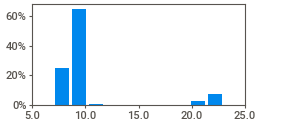
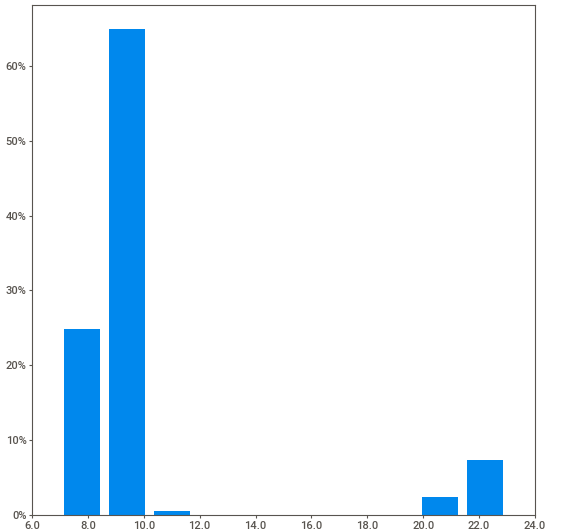
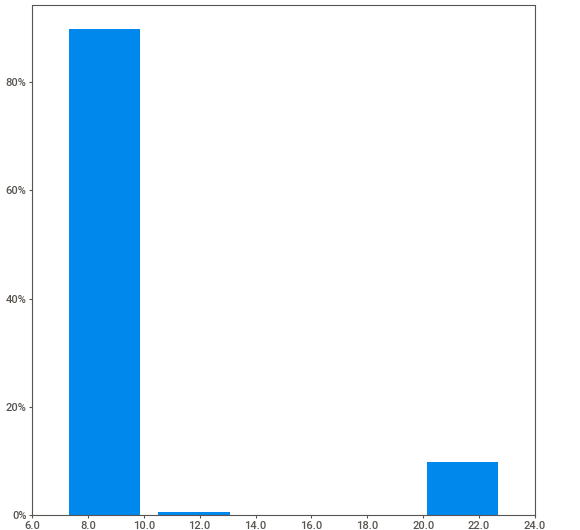
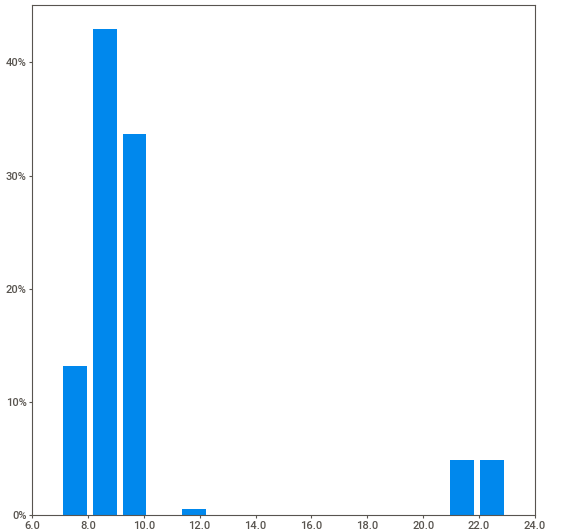
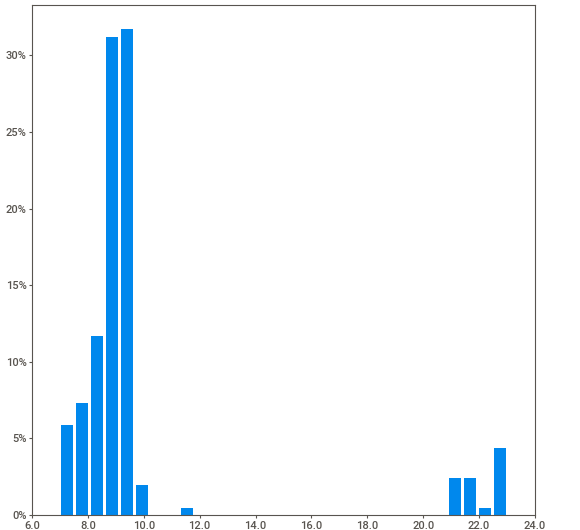
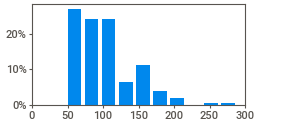
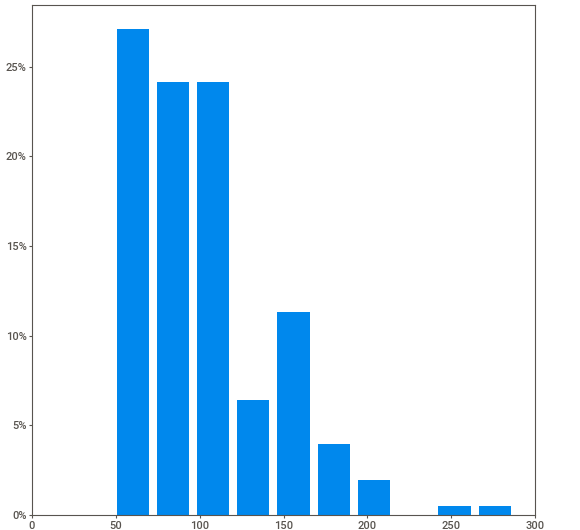
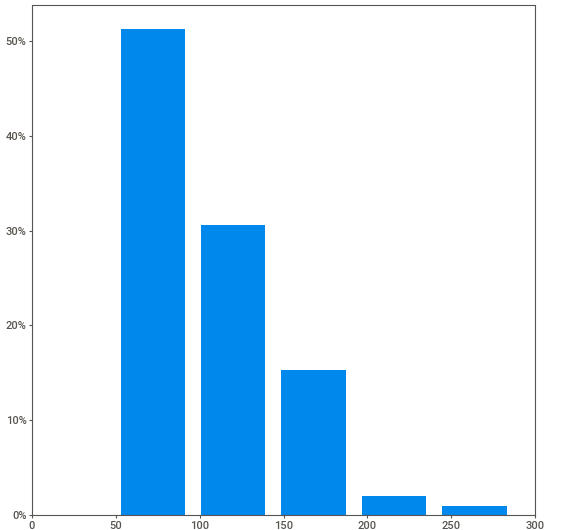
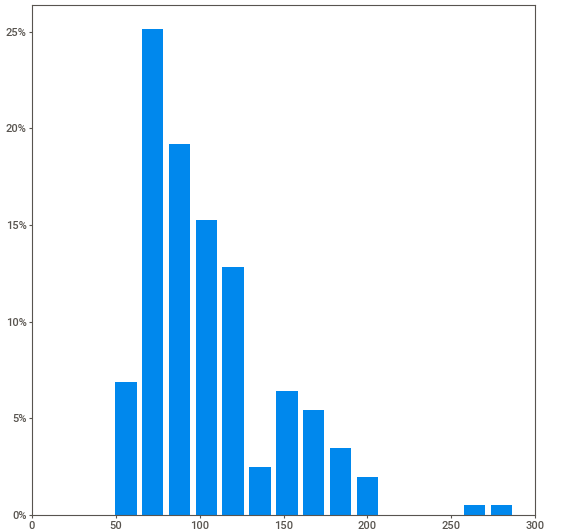
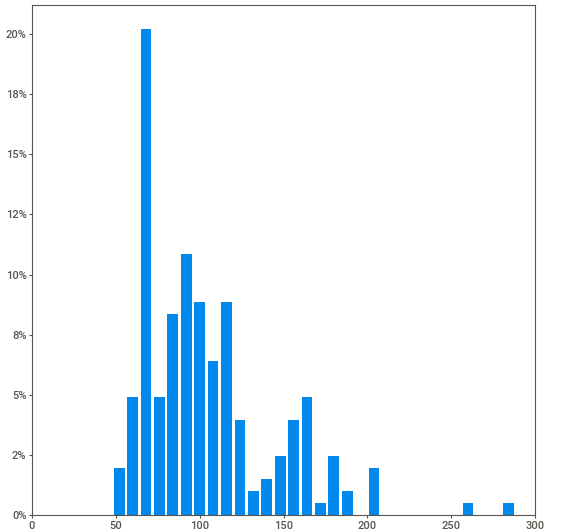
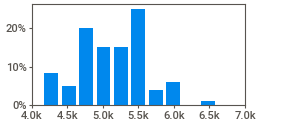
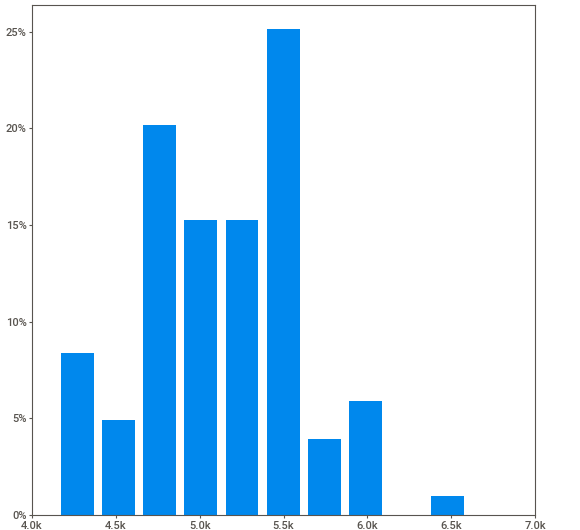
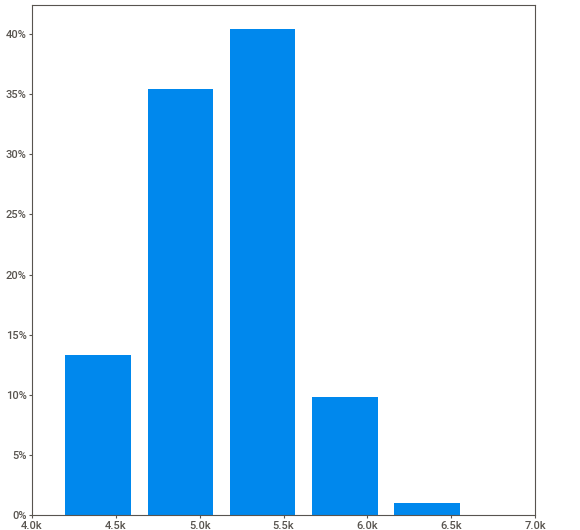
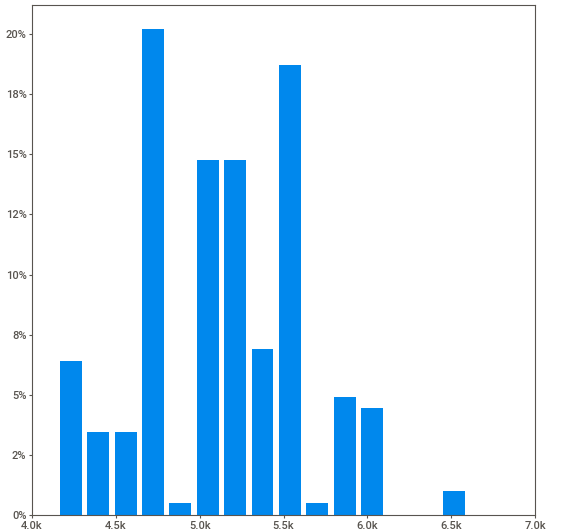
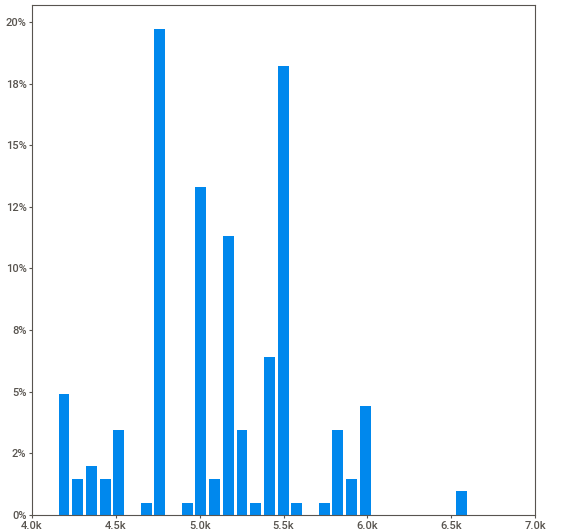
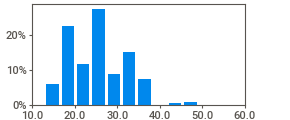
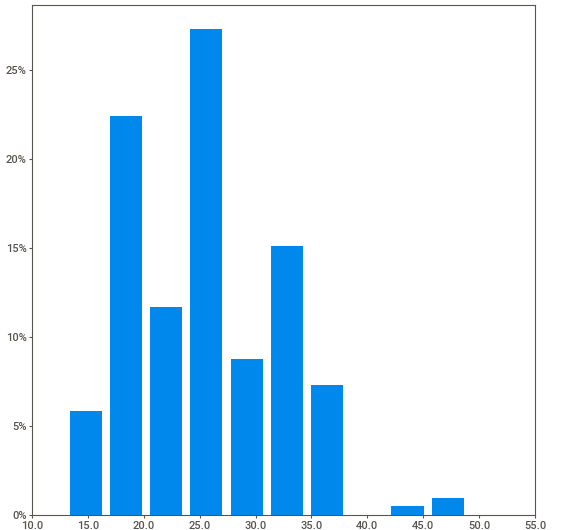
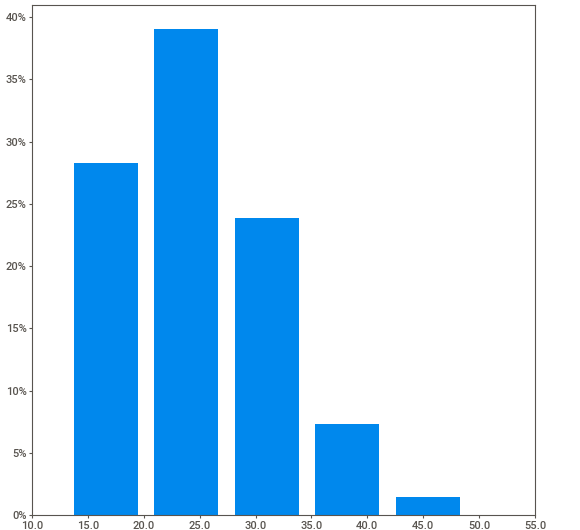
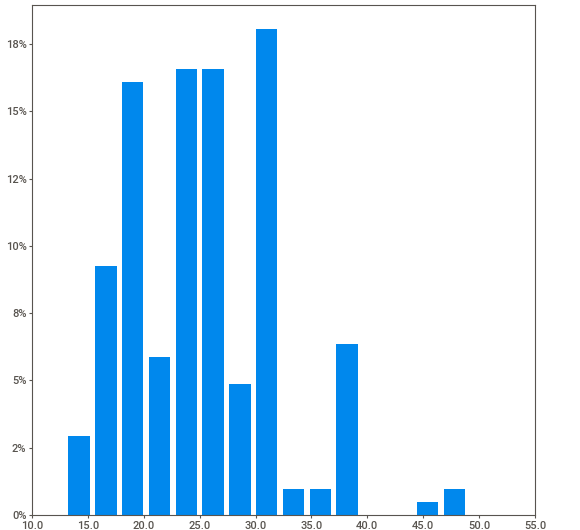
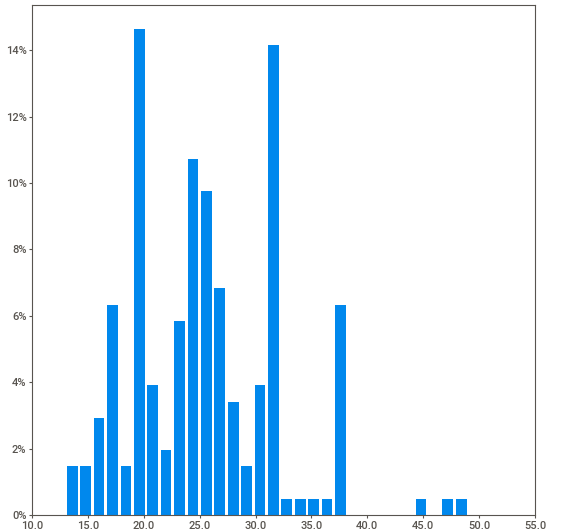
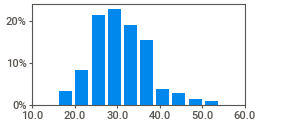
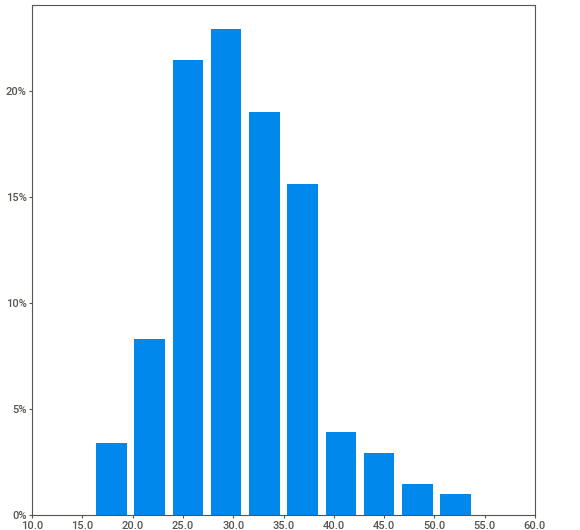
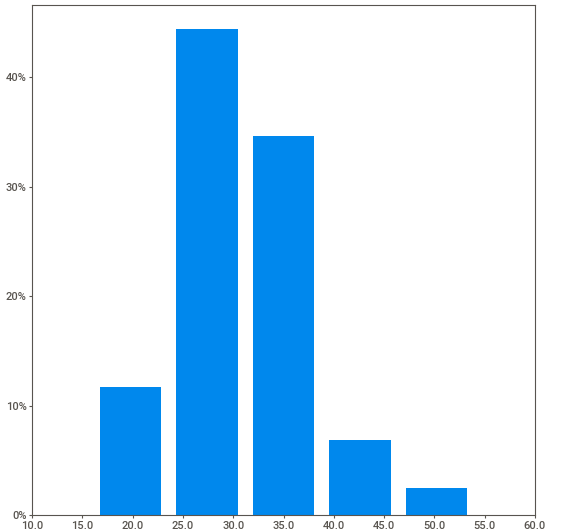
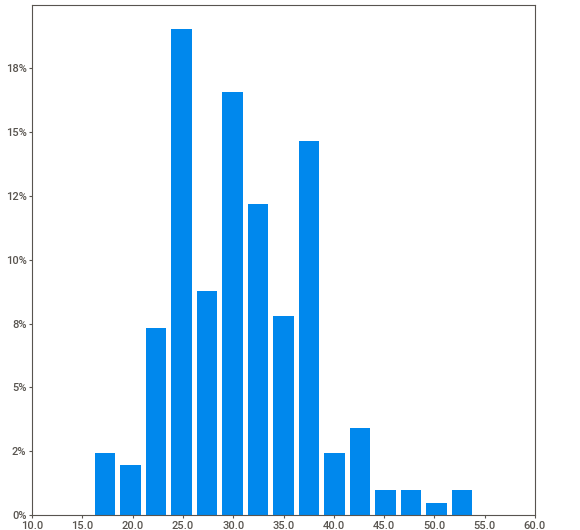
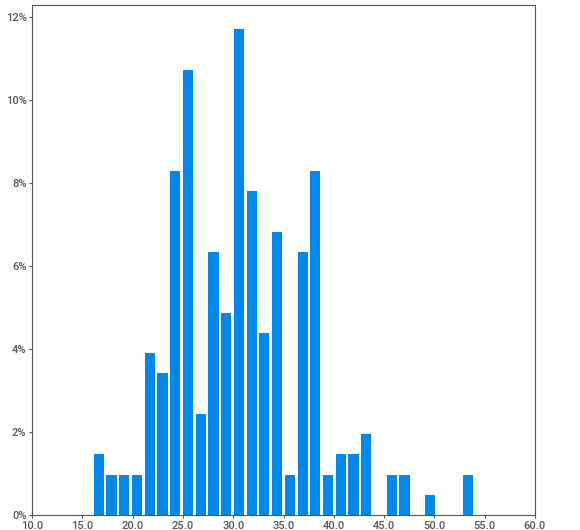
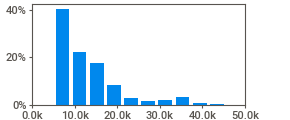
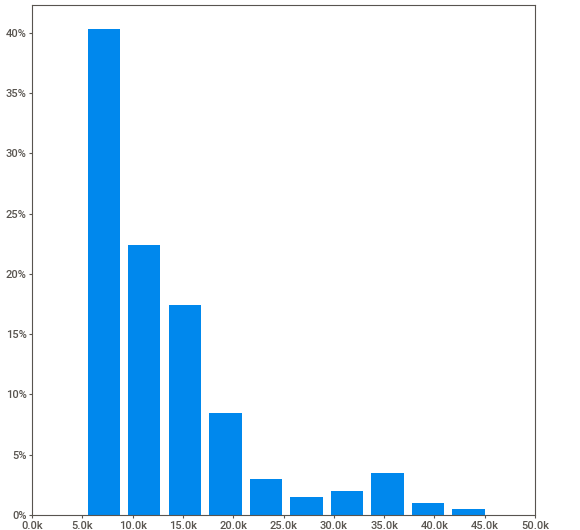
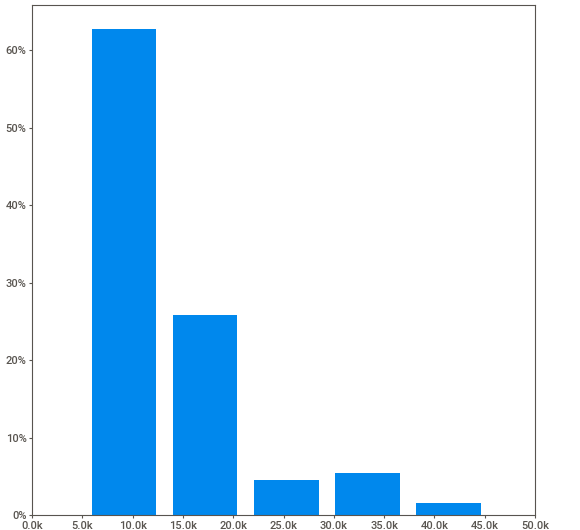
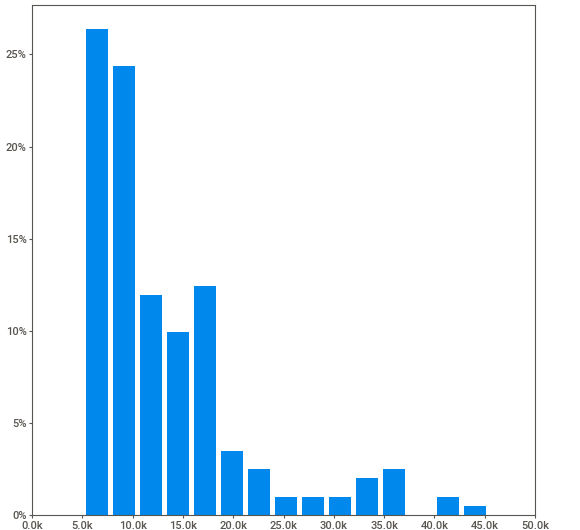
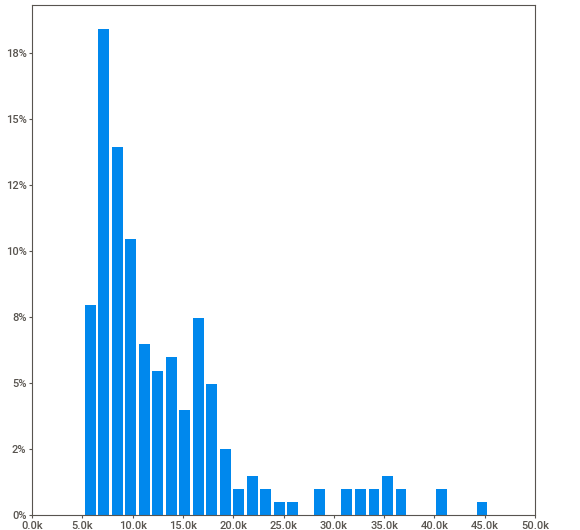
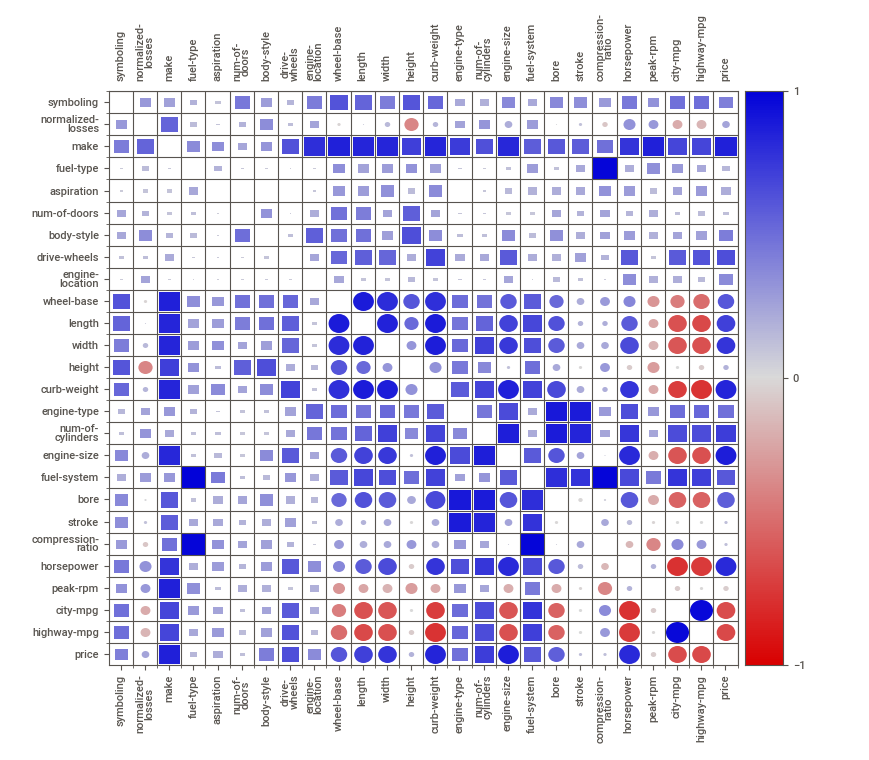
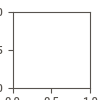

In [7]:
## Displating EDA report in notebook itself

my_report.show_notebook(w=None, 
                        h=None, 
                        scale=None,
                        layout='widescreen',
                        filepath=None)

In [8]:
## Creating a copy of dataframe
df_new = df.copy()

## Replacing Null value in 'price' column with mean
df_new['price'] = df_new['price'].fillna(df_new['price'].mean())

## Converting price column from string to int
df_new['price'] = df_new['price'].astype(int)

## Splitting  the dataframe into 2 dataframes (Train and Test)
df_train = df_new[0:150]
df_test = df_new[150:]

## Imputing missing values in "price" column with mean
df_train['price'] = df_train['price'].fillna(df_train['price'].mean()).astype(int)
df_test['price'] = df_test['price'].fillna(df_test['price'].mean()).astype(int)

C:\Users\ASHISH~1.KAM\AppData\Local\Temp/ipykernel_20252/372027813.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['price'] = df_train['price'].fillna(df_train['price'].mean()).astype(int)
C:\Users\ASHISH~1.KAM\AppData\Local\Temp/ipykernel_20252/372027813.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['price'] = df_test['price'].fillna(df_test['price'].mean()).astype(int)


In [9]:
## Comparing two dataframes (e.g. Test vs Training sets)
comparison_report = sv.compare([df_train,'Train'], [df_test,'Test'], target_feat='price')

                                             |                                             | [  0%]   00:00 ->…


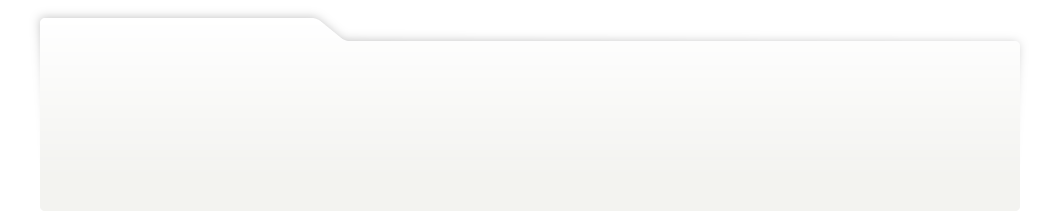
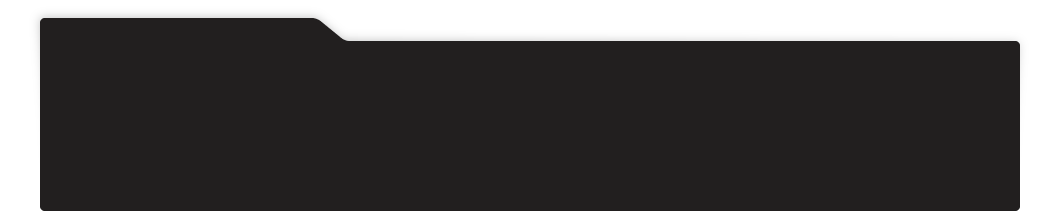
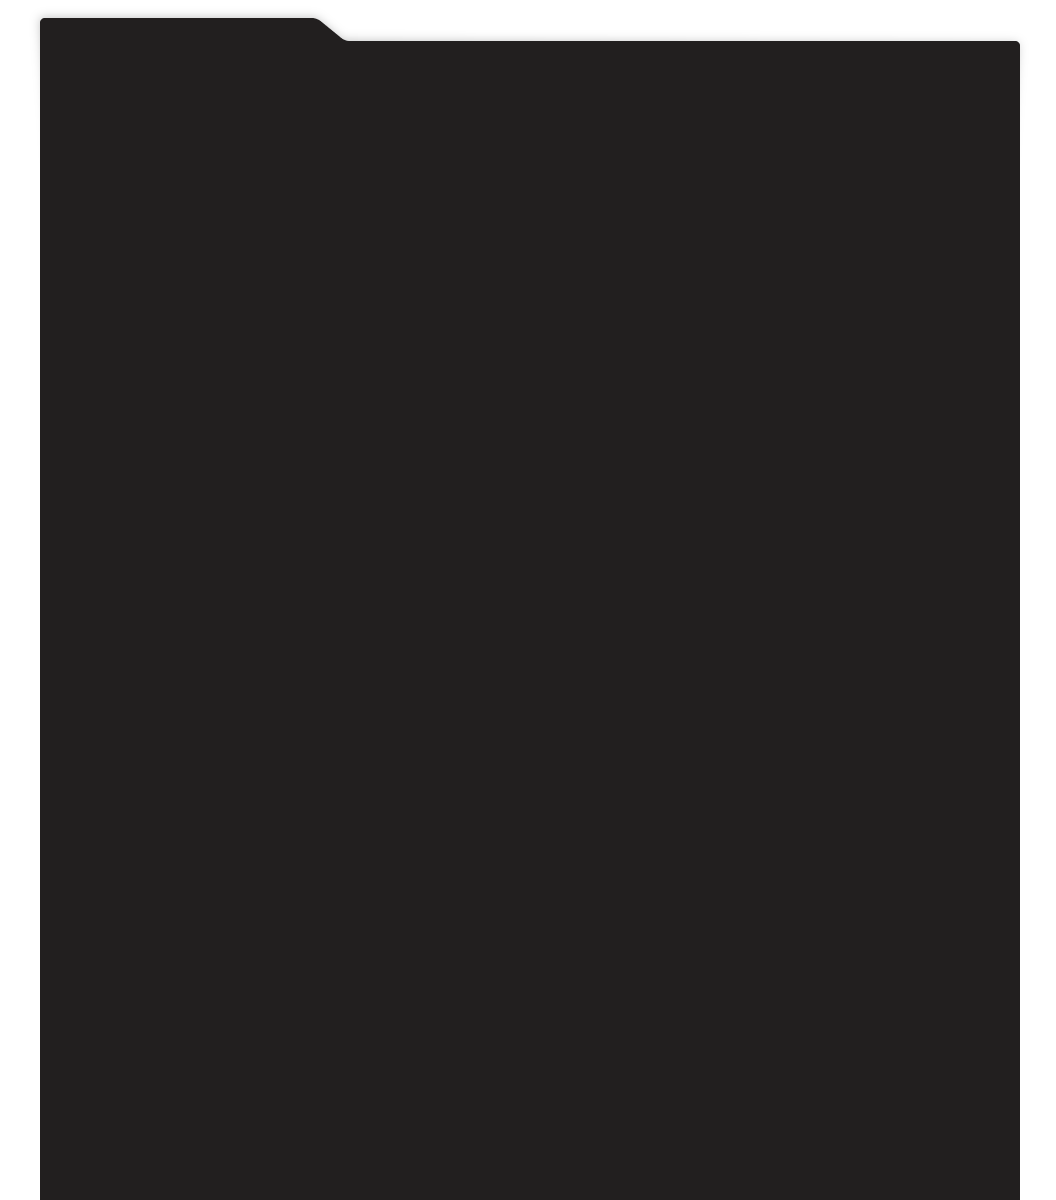
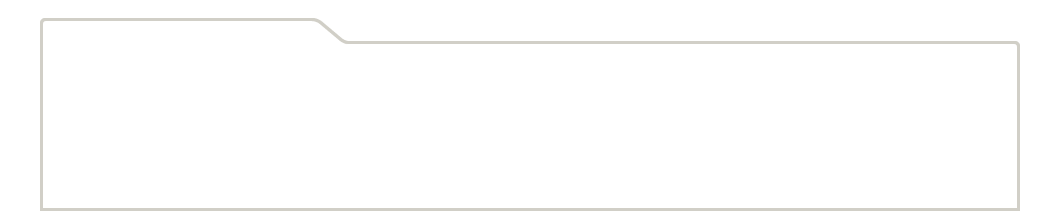
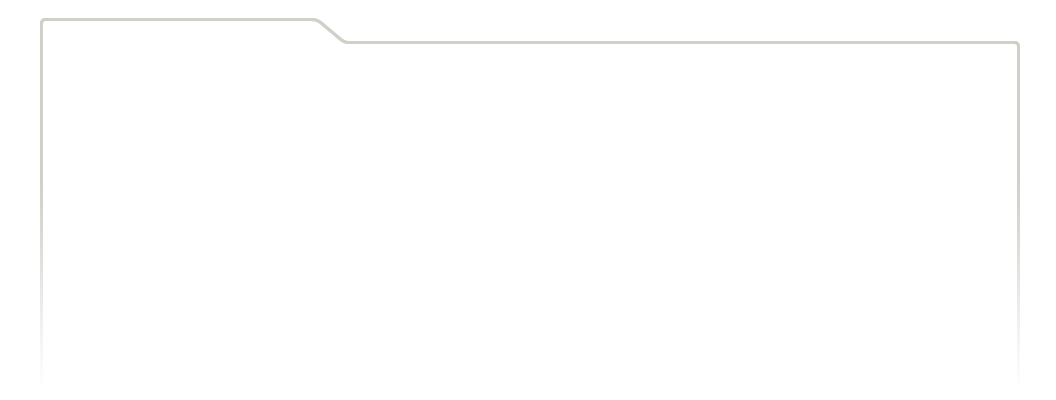
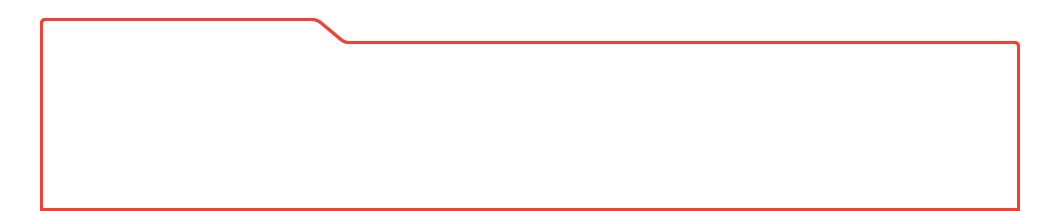
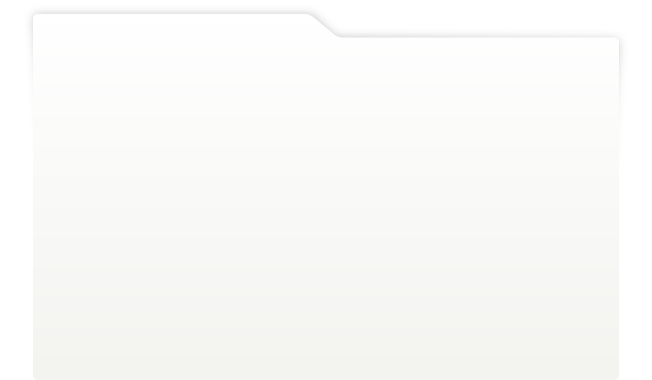
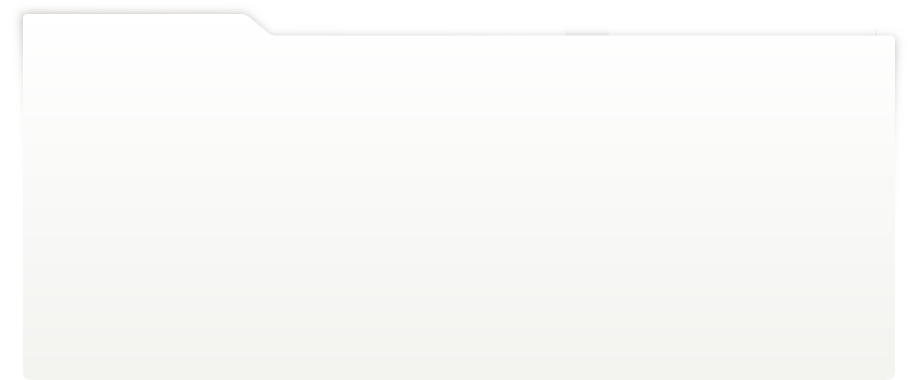
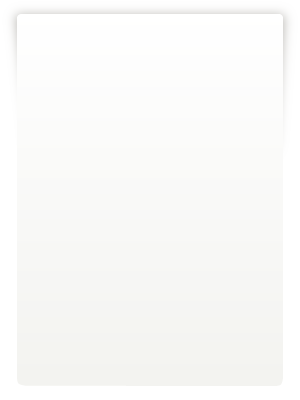
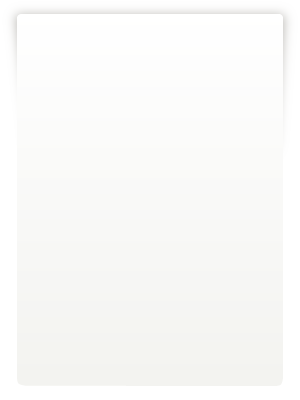
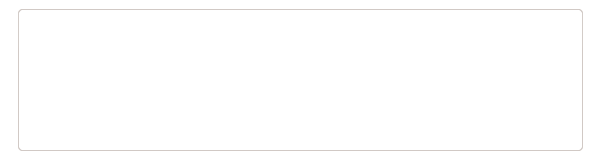
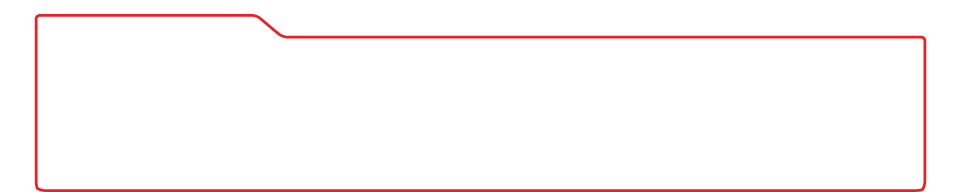
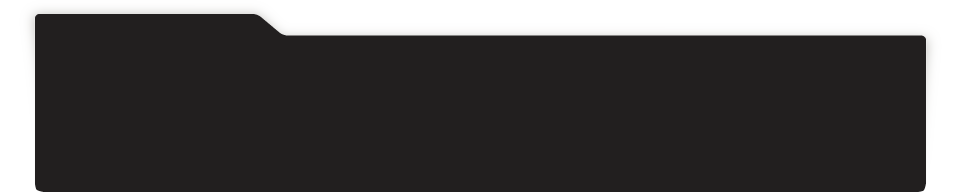
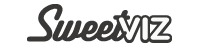
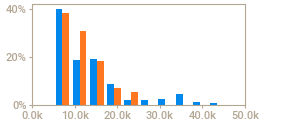
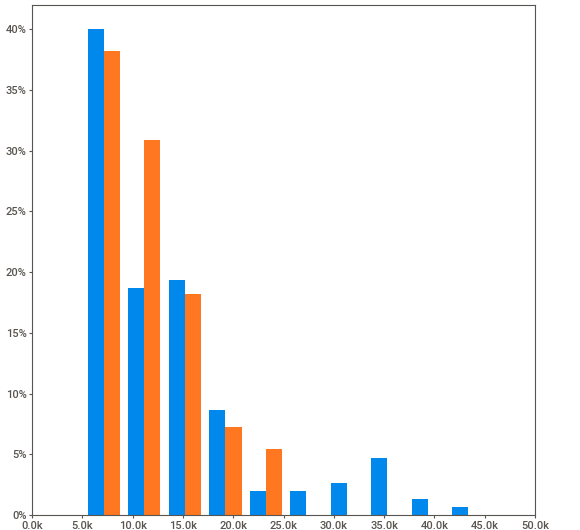
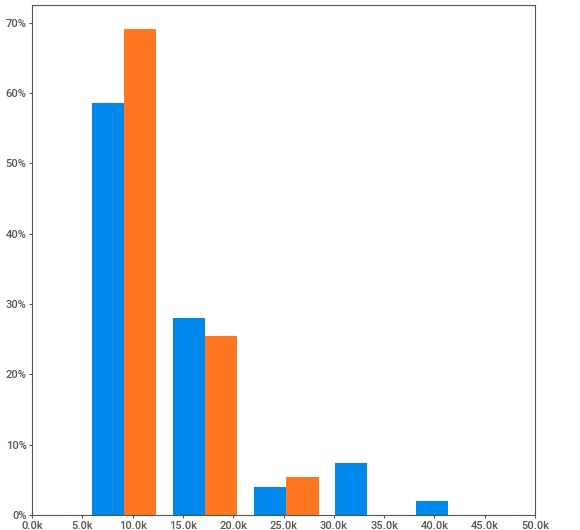
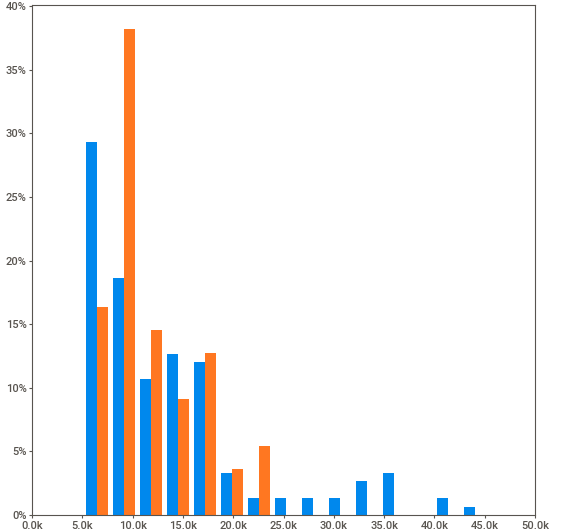
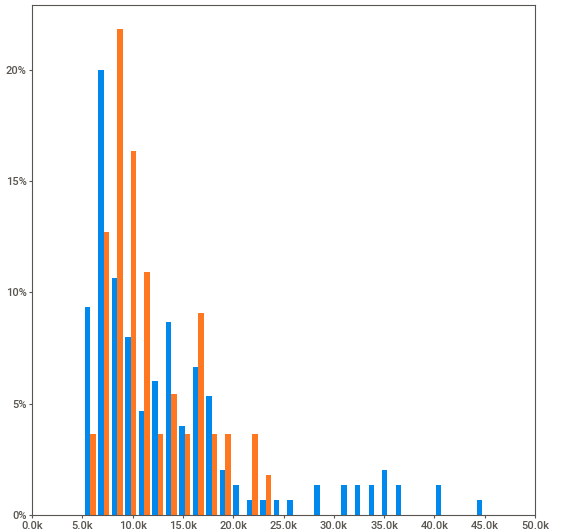
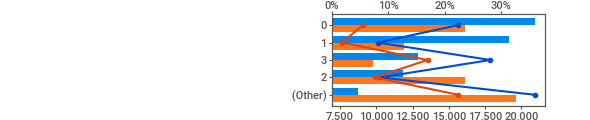
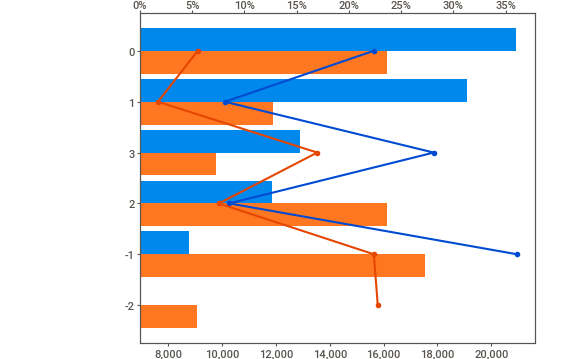
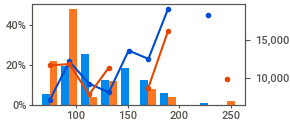
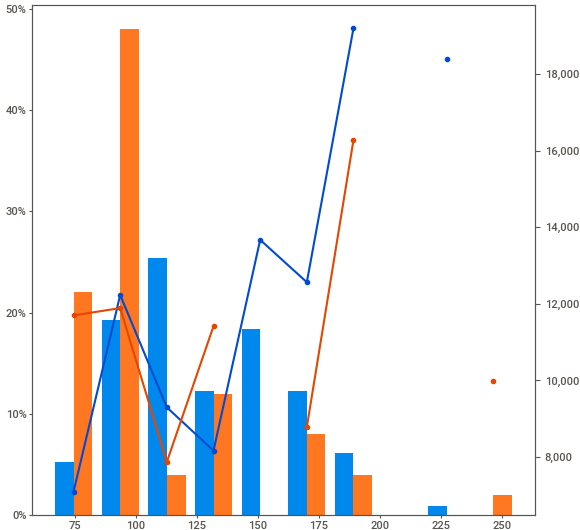
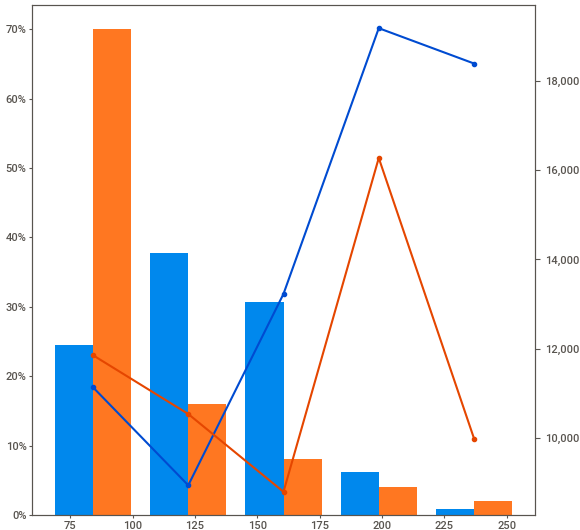
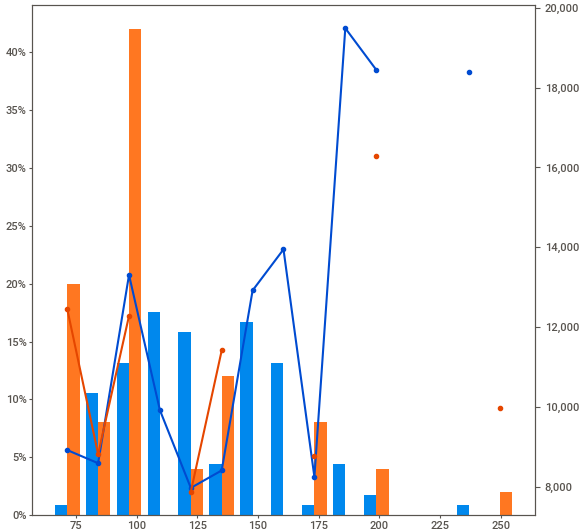
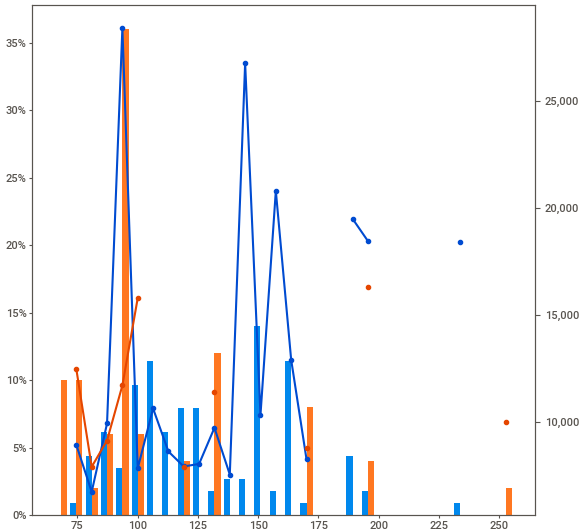
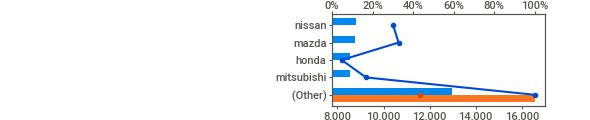
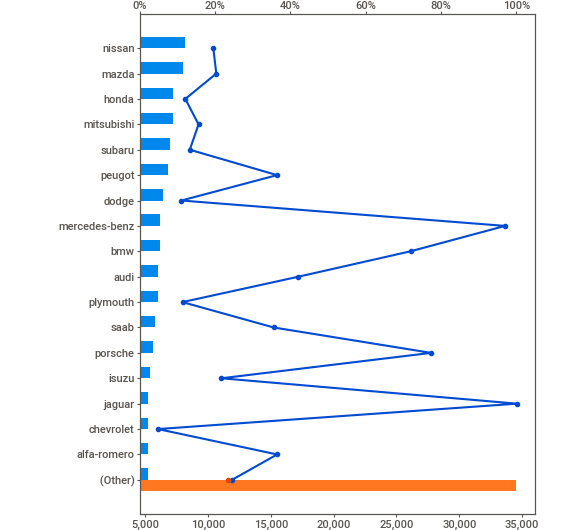
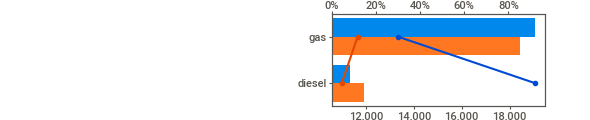
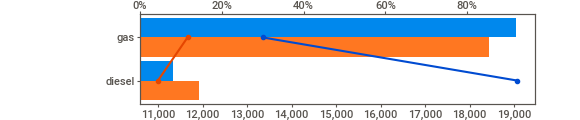
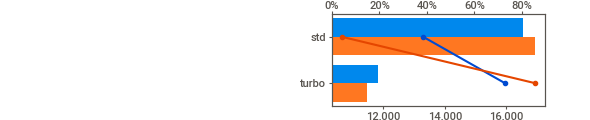
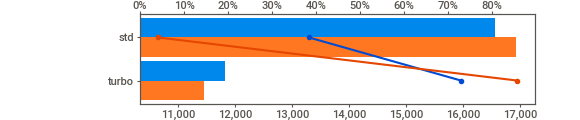
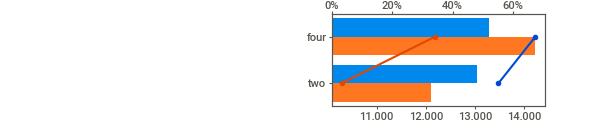
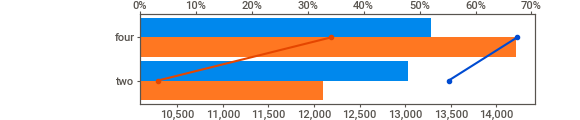
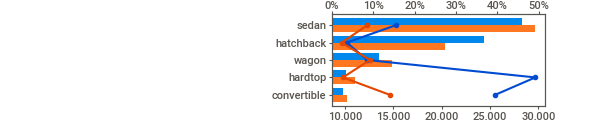
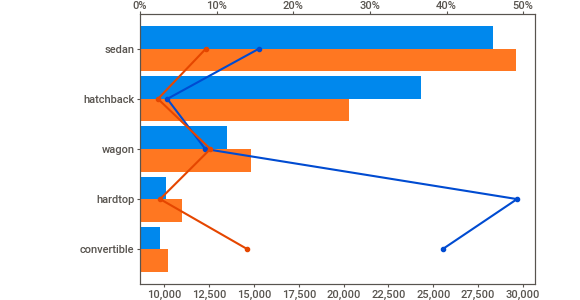
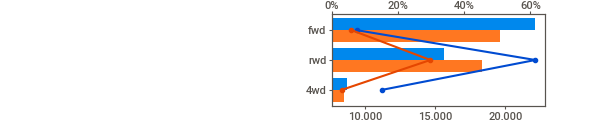
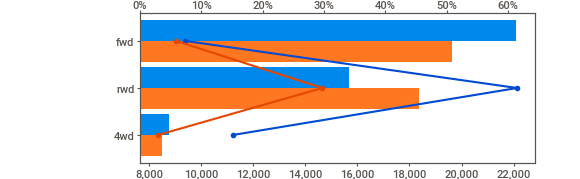
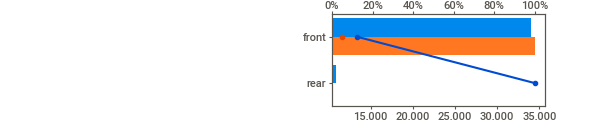
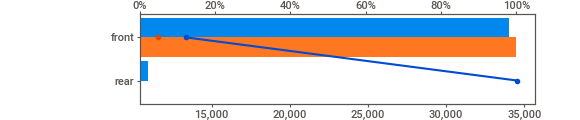
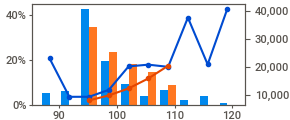
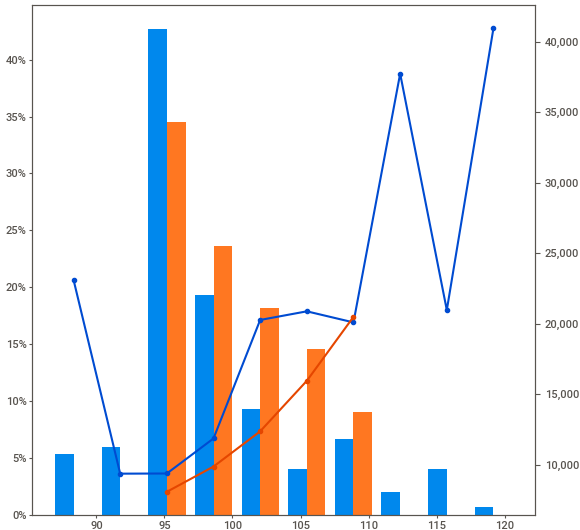
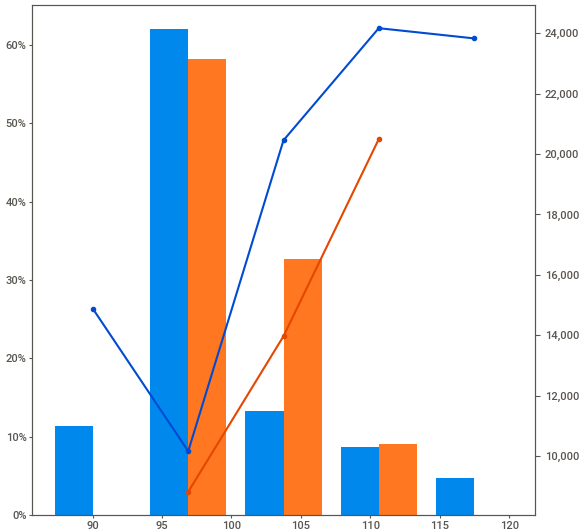
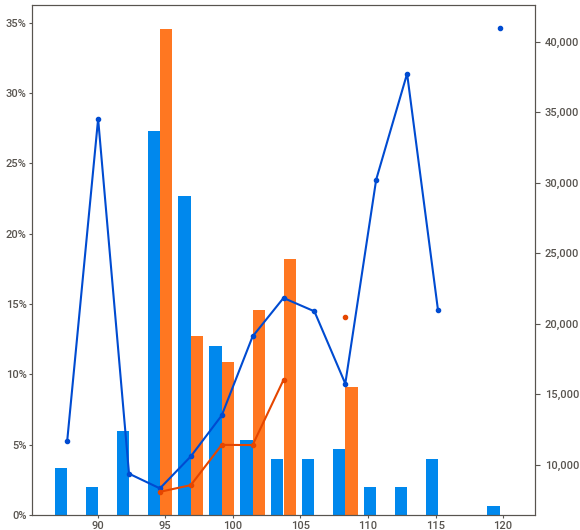
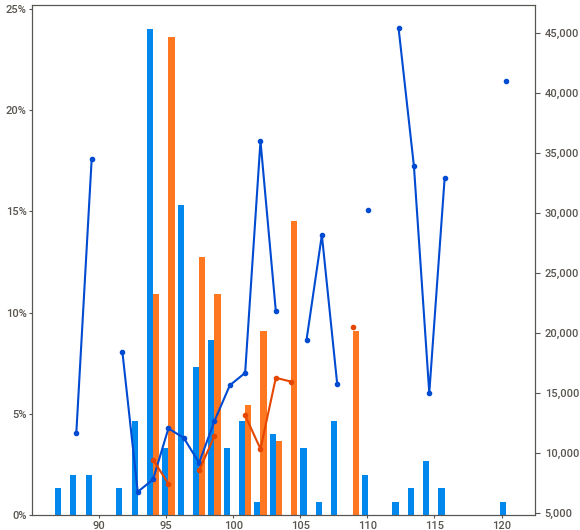
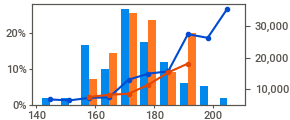
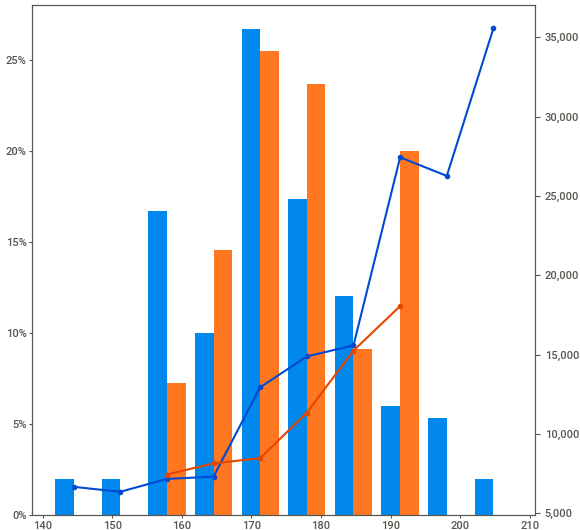
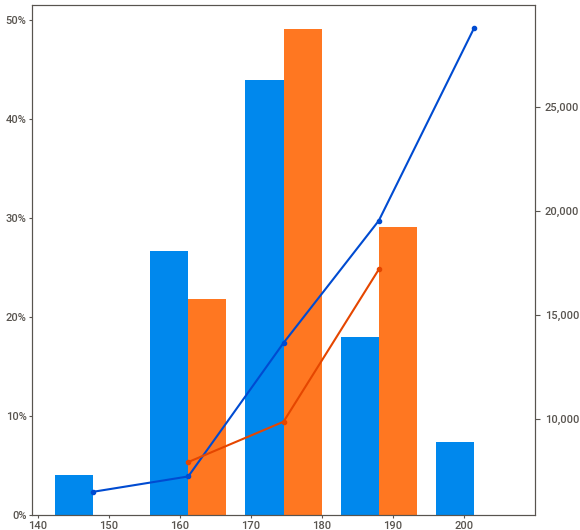
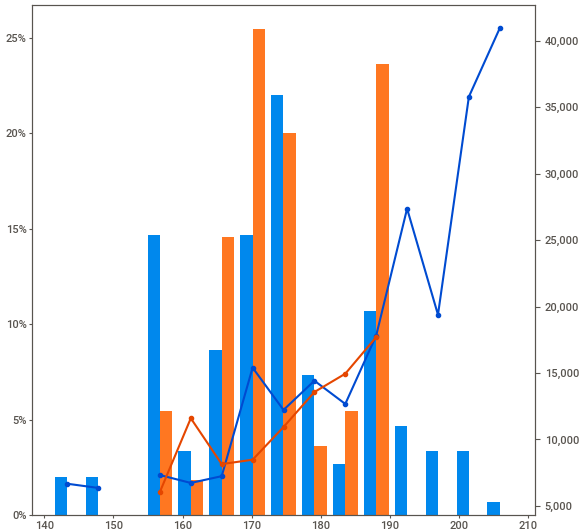
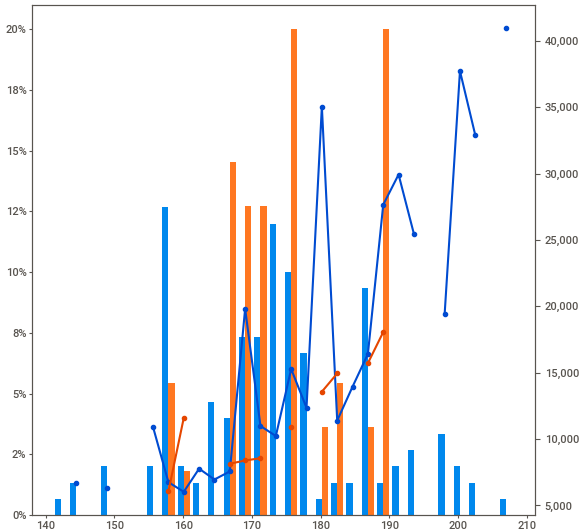
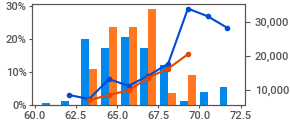
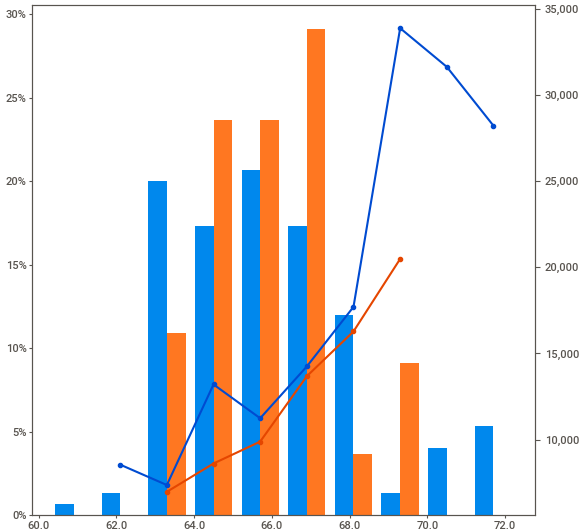
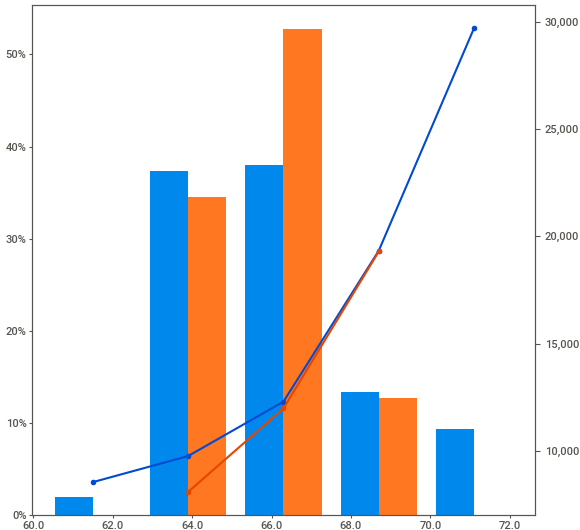
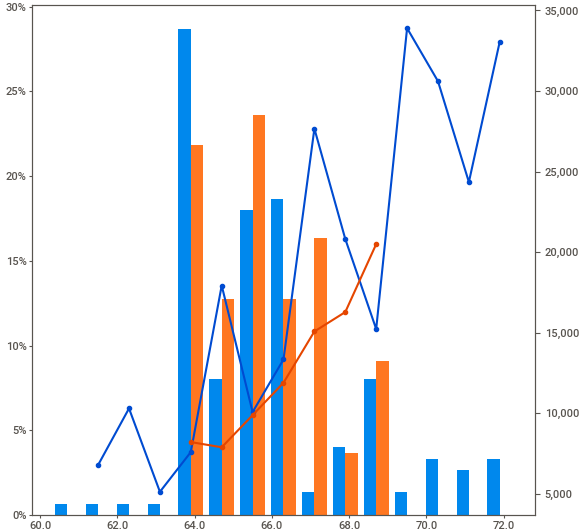
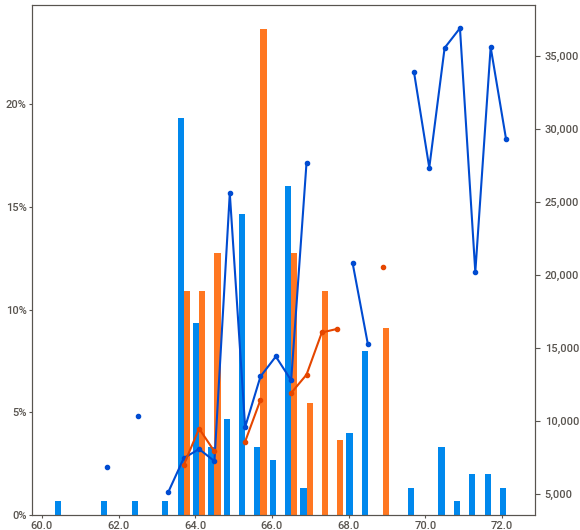
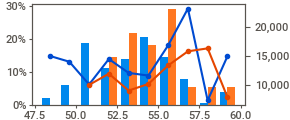
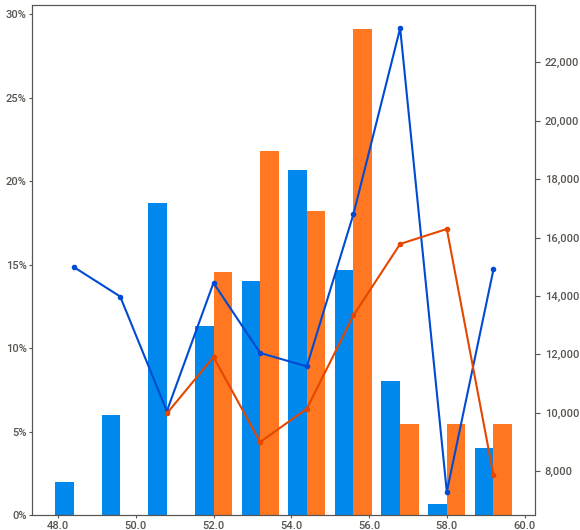
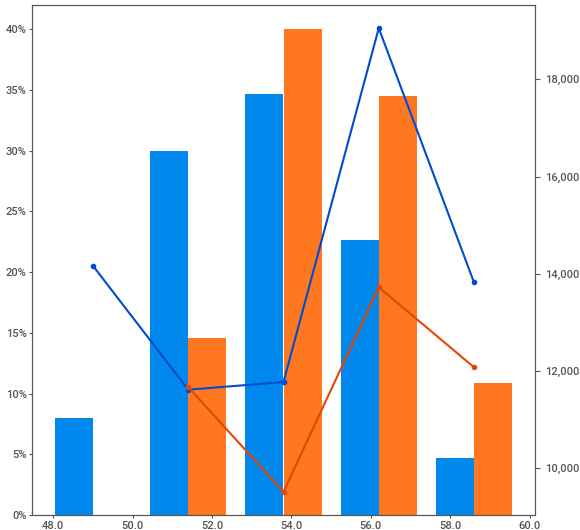
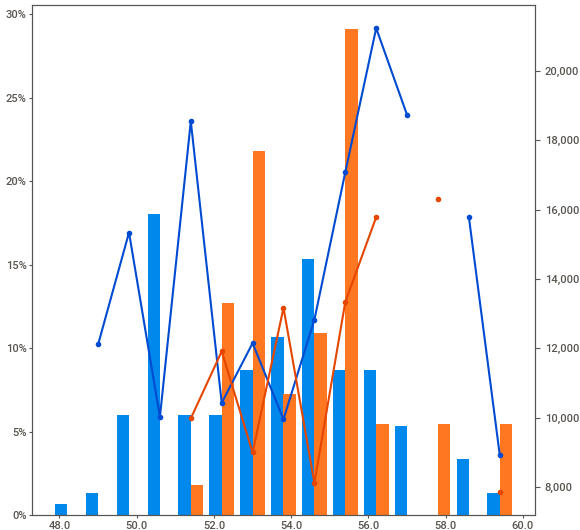
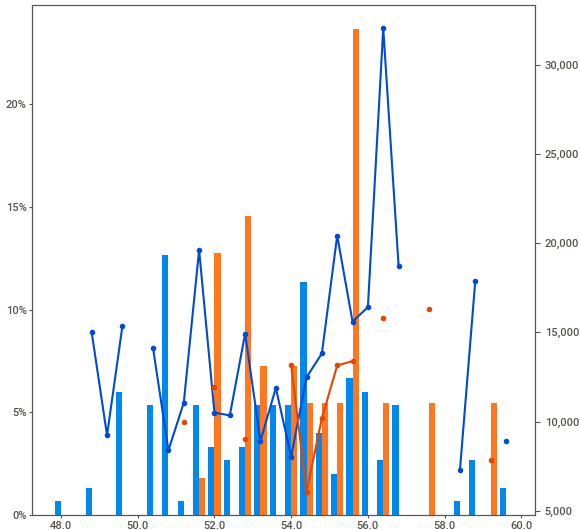
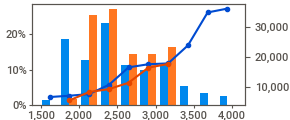
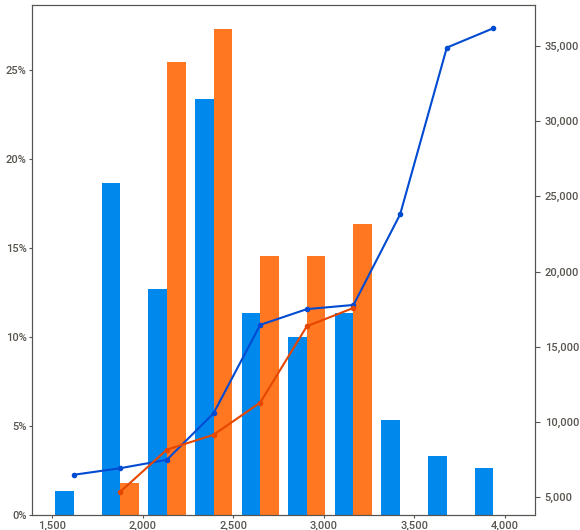
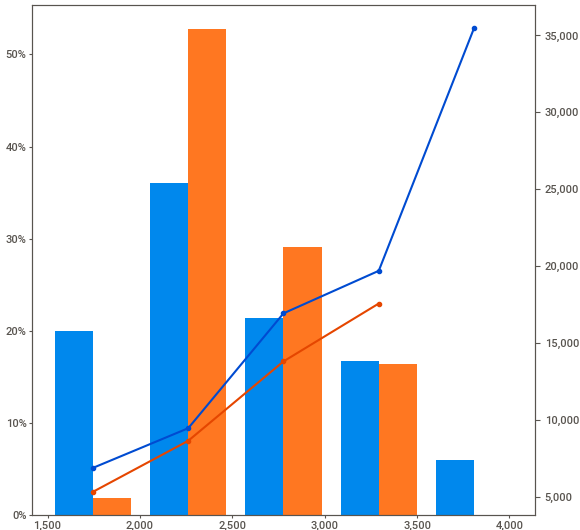
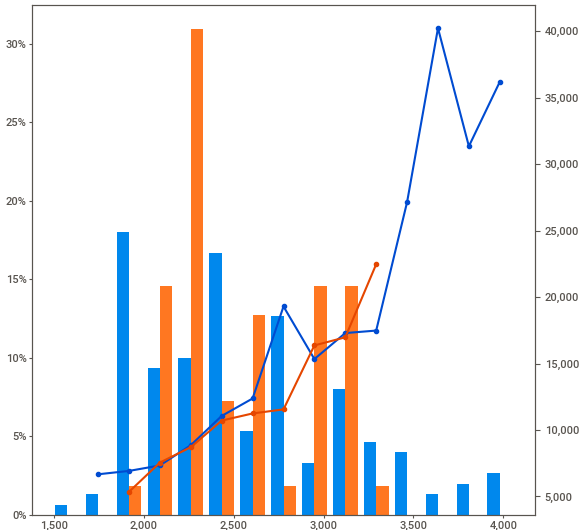
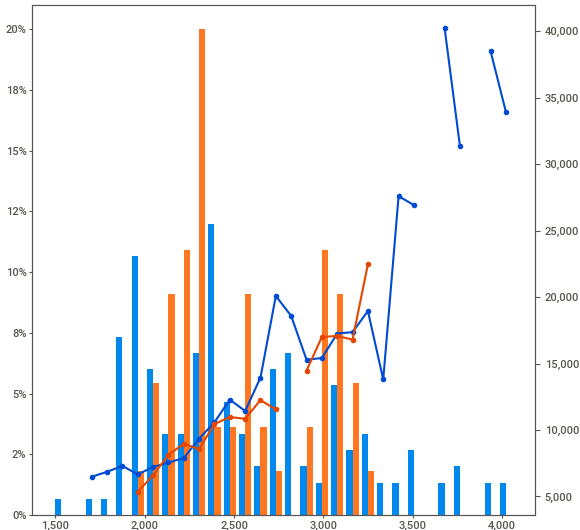
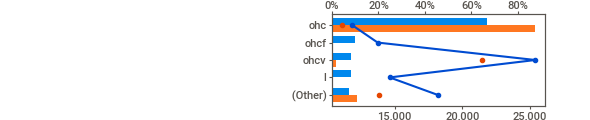
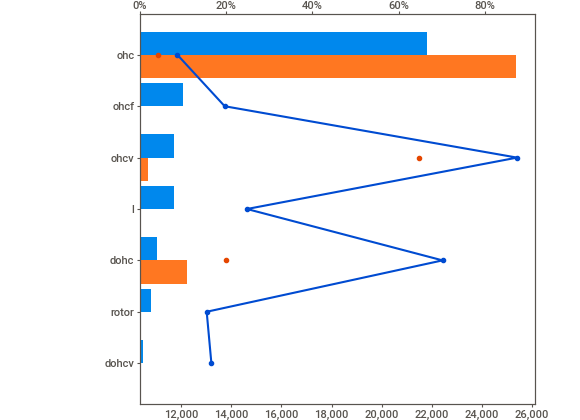
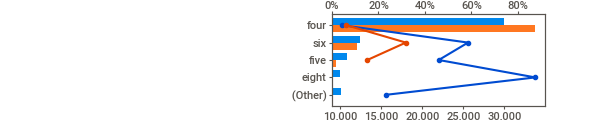
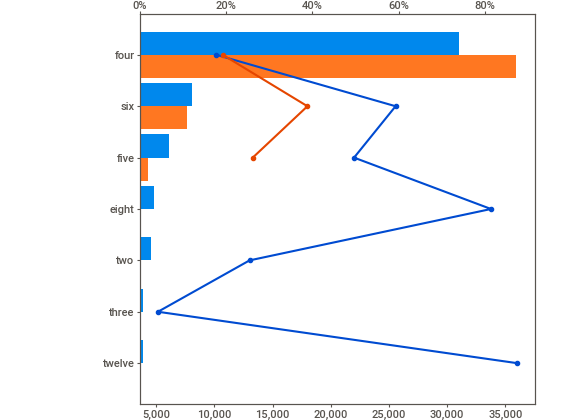
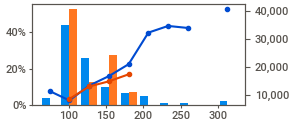
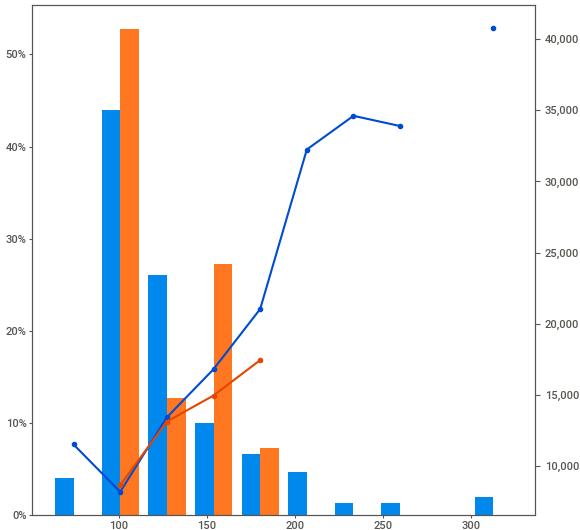
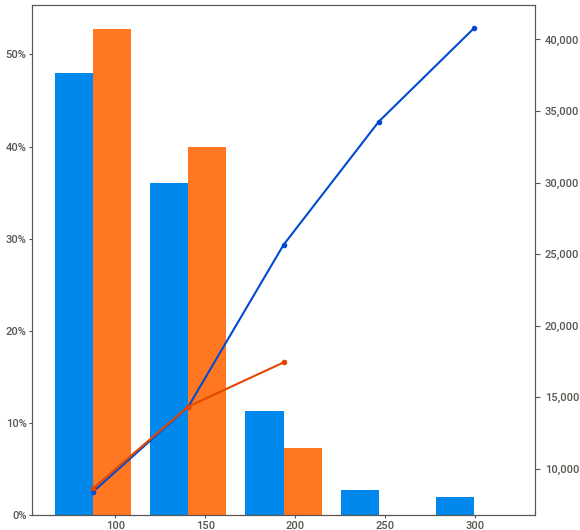
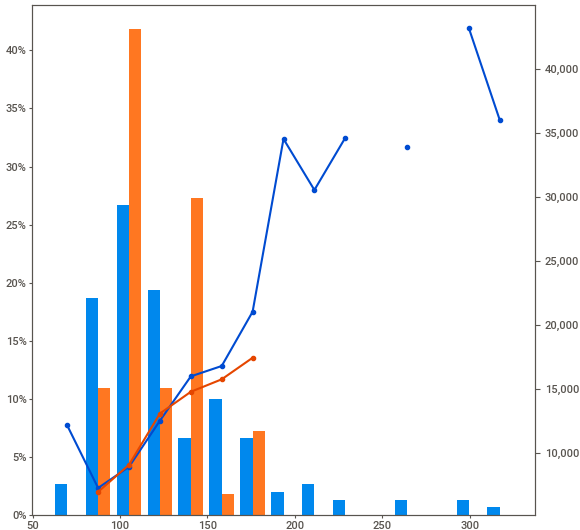
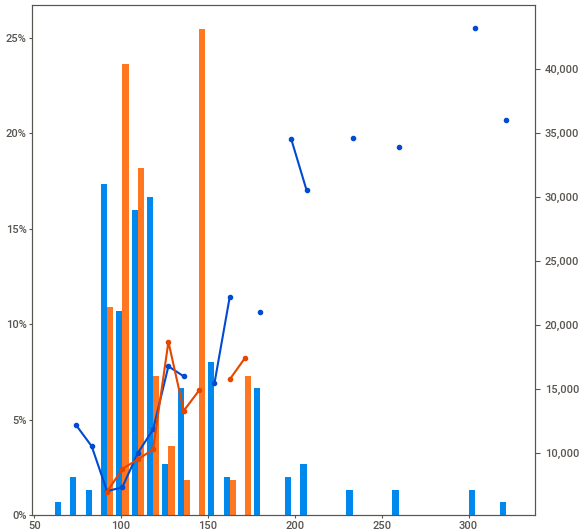
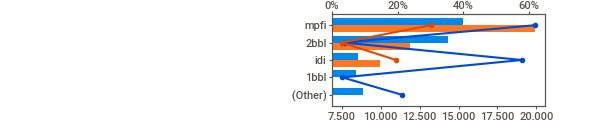
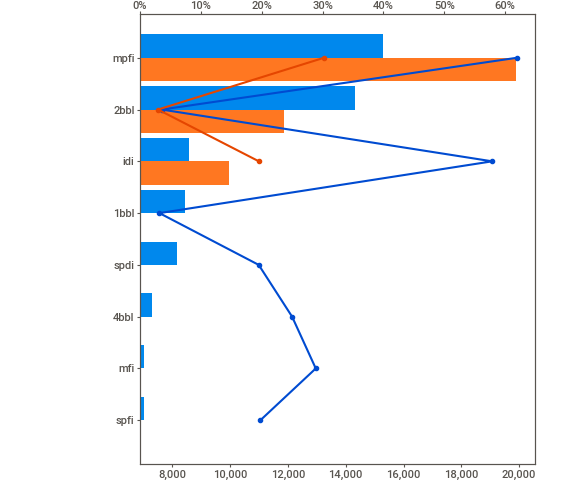
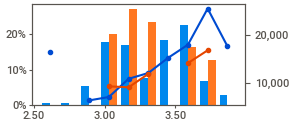
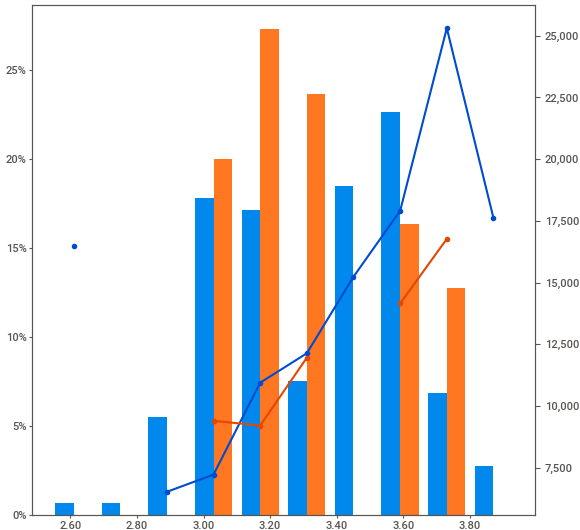
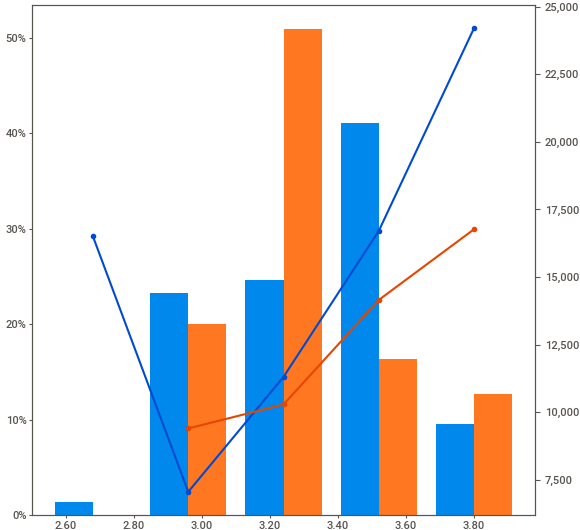
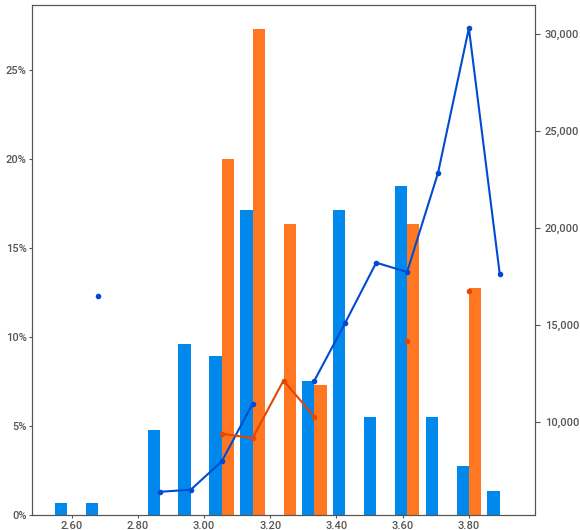
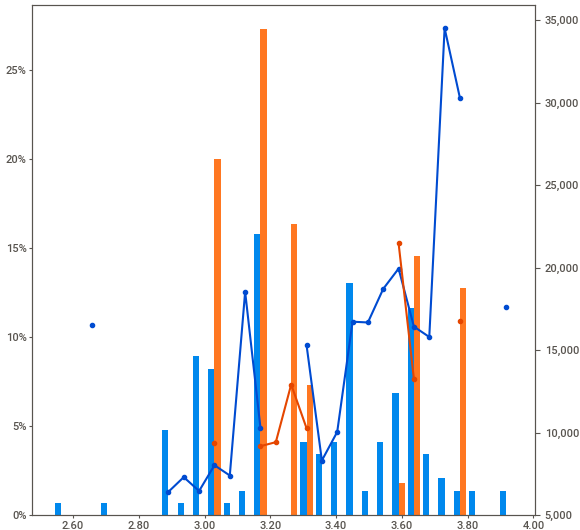
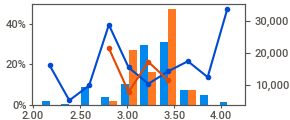
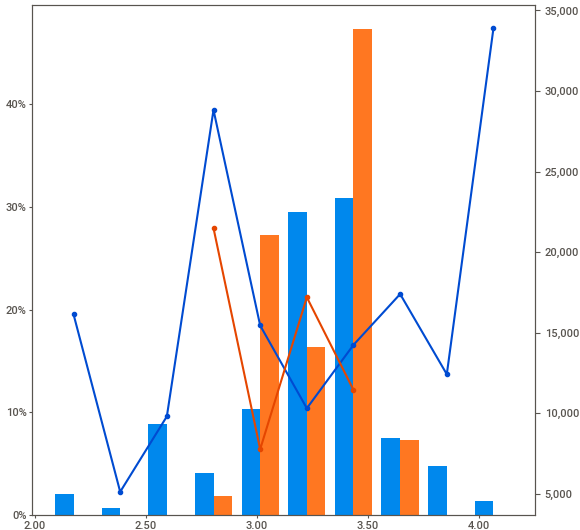
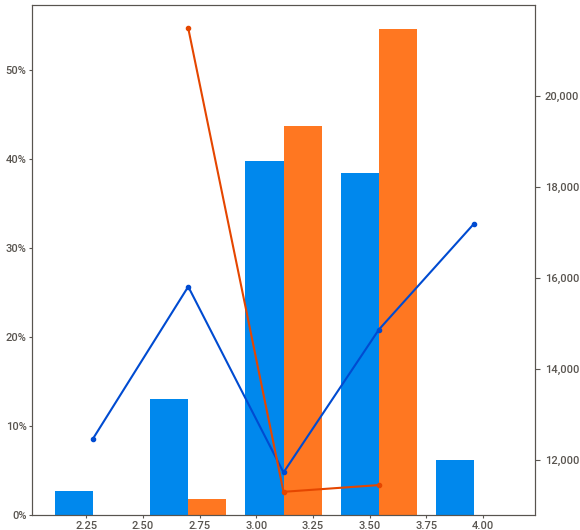
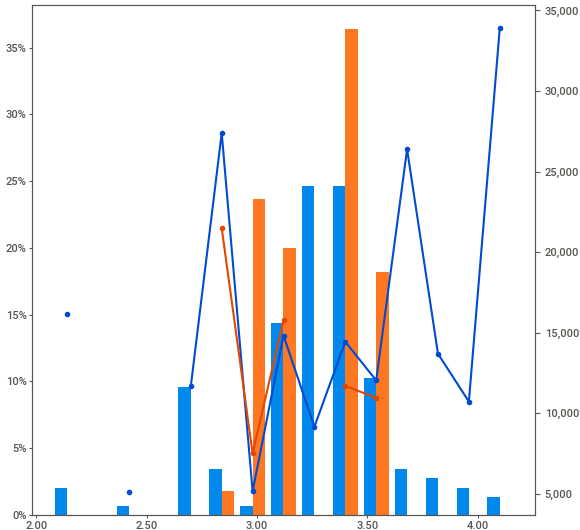
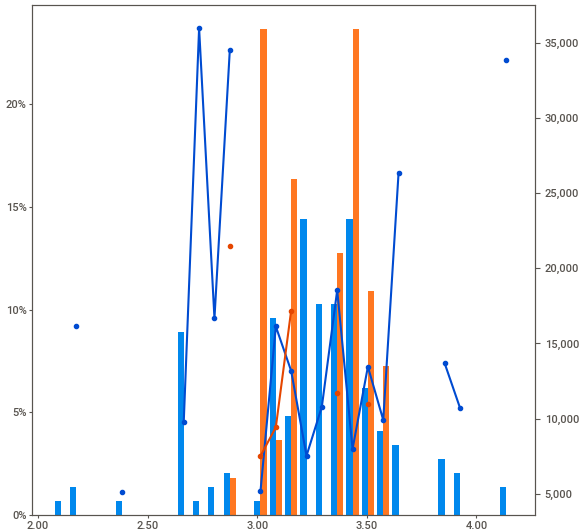
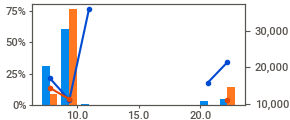
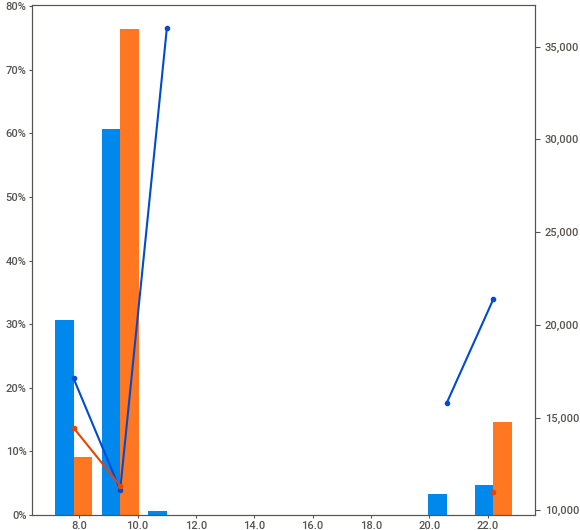
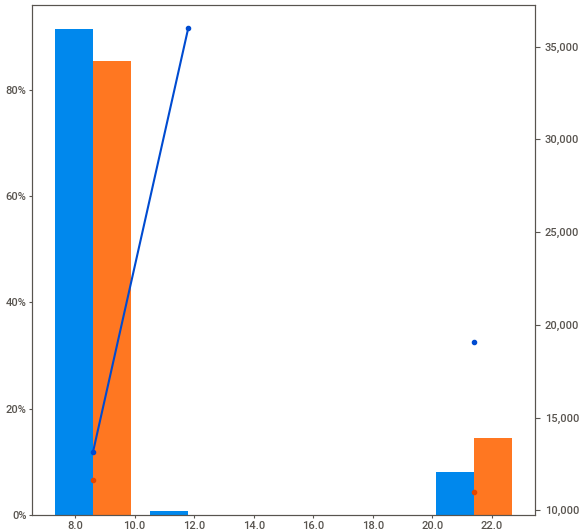
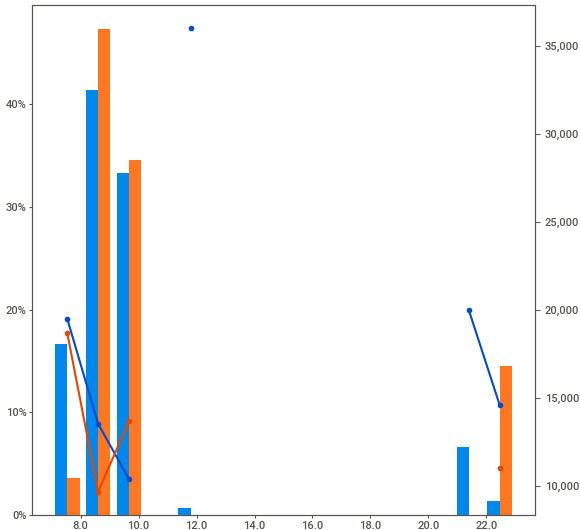
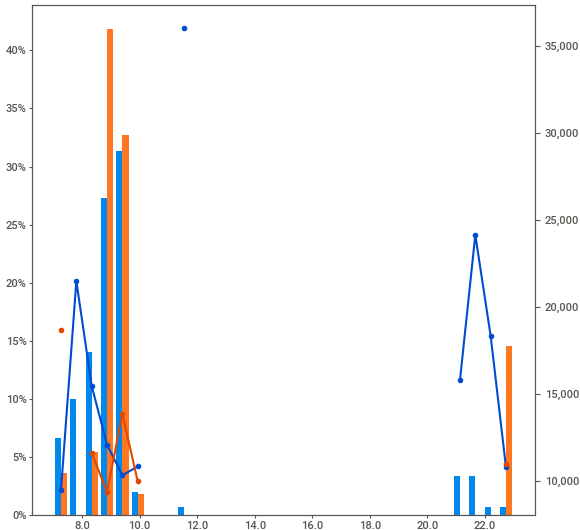
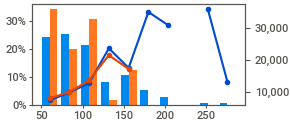
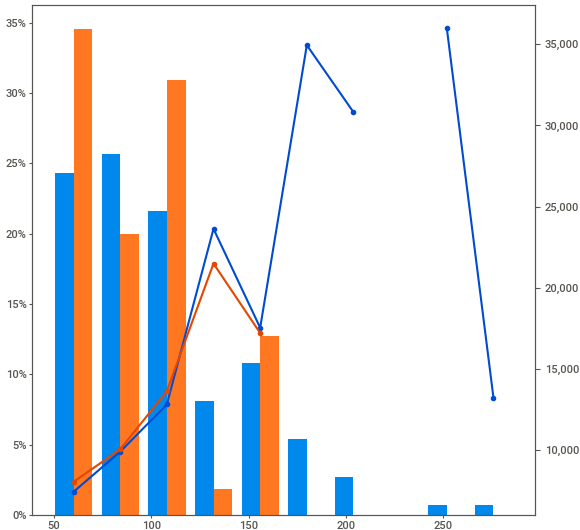
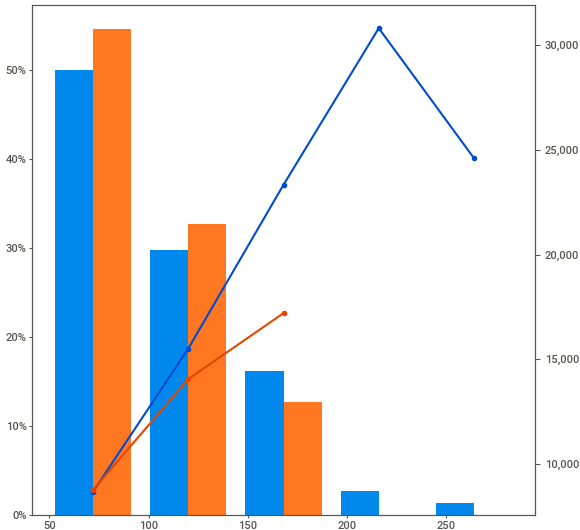
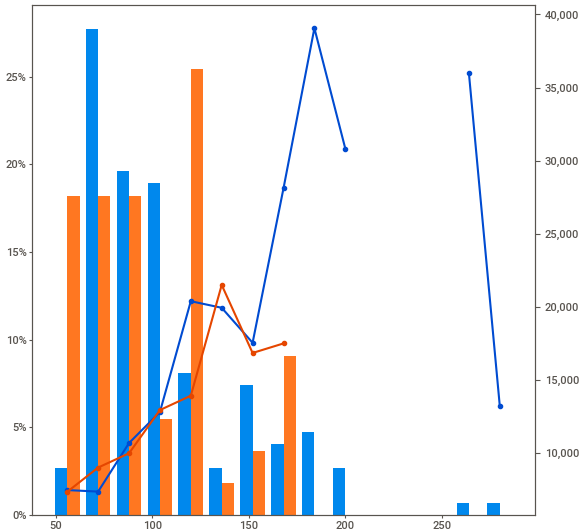
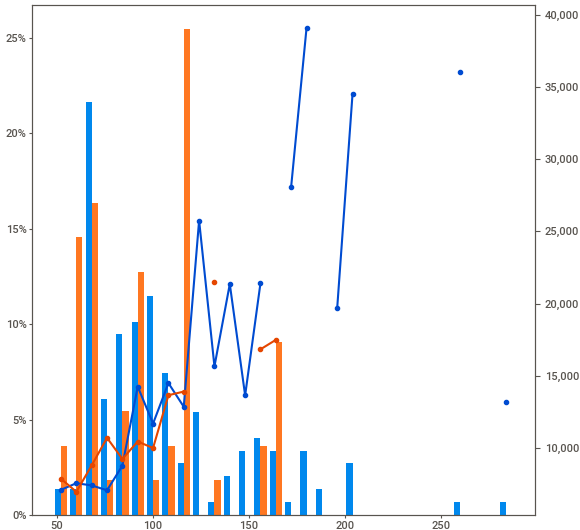
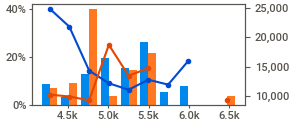
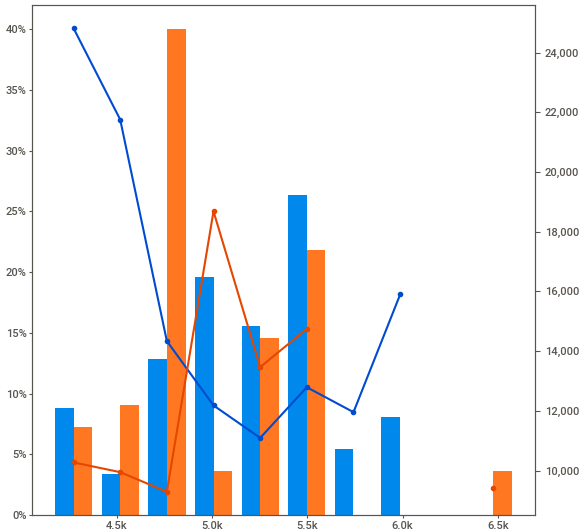
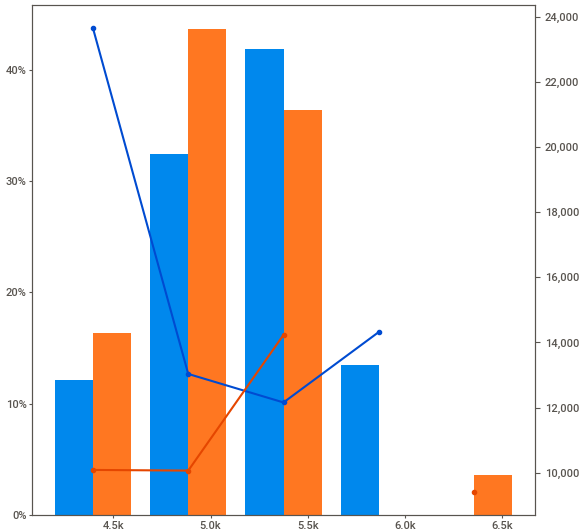
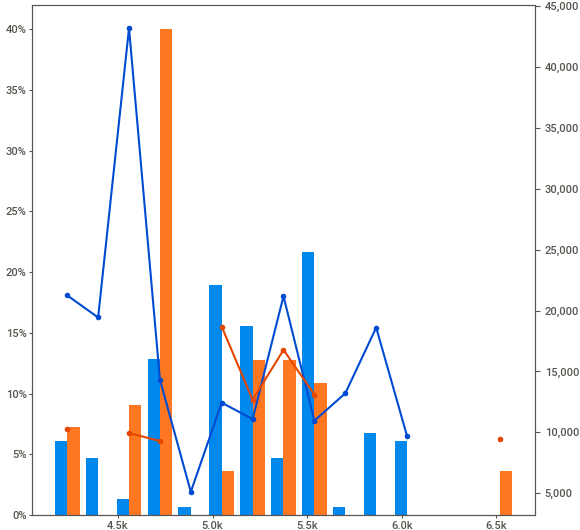
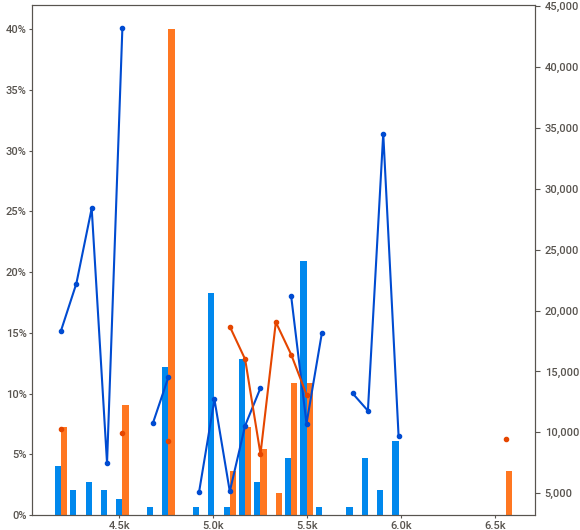
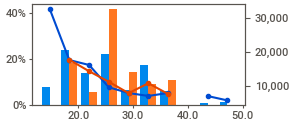
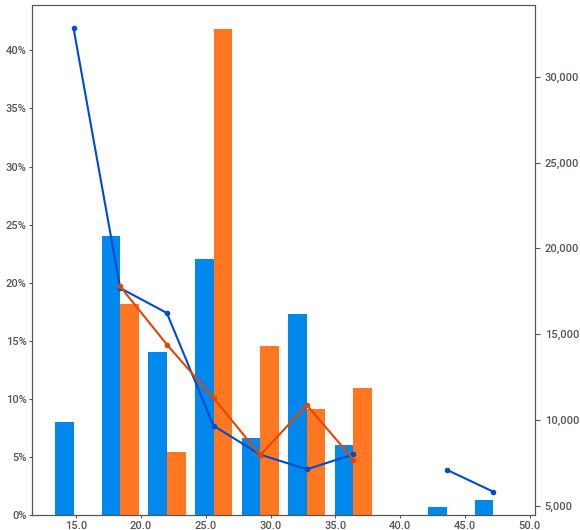
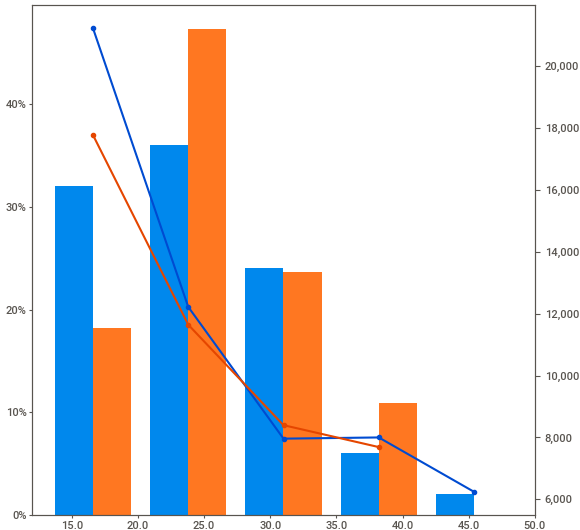
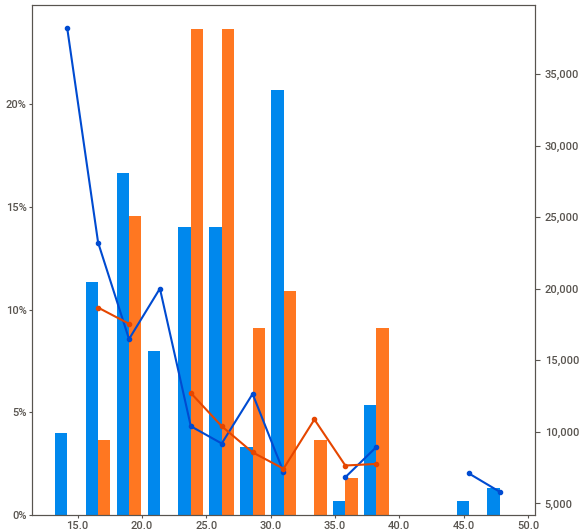
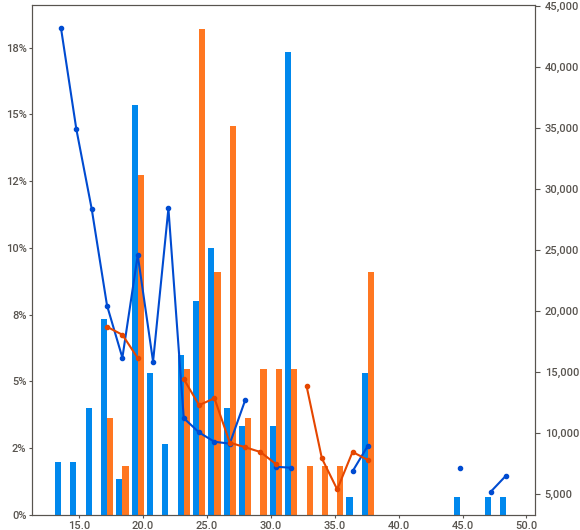
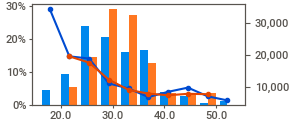
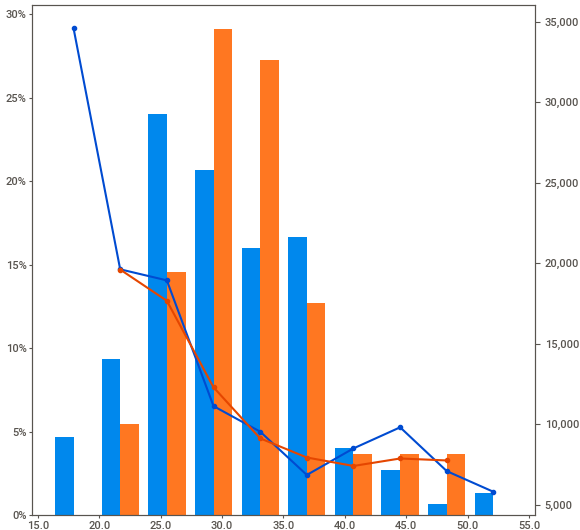
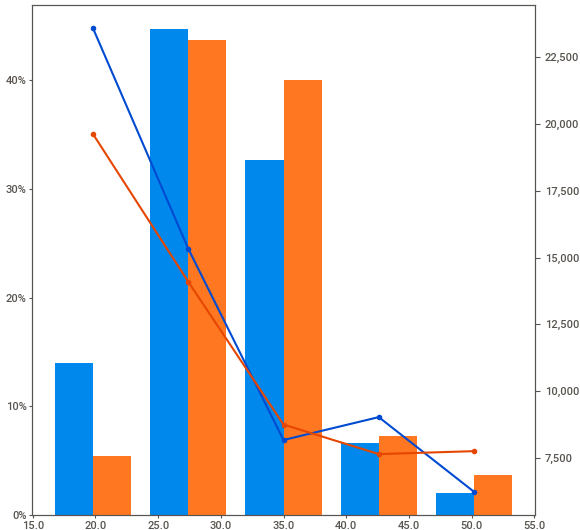
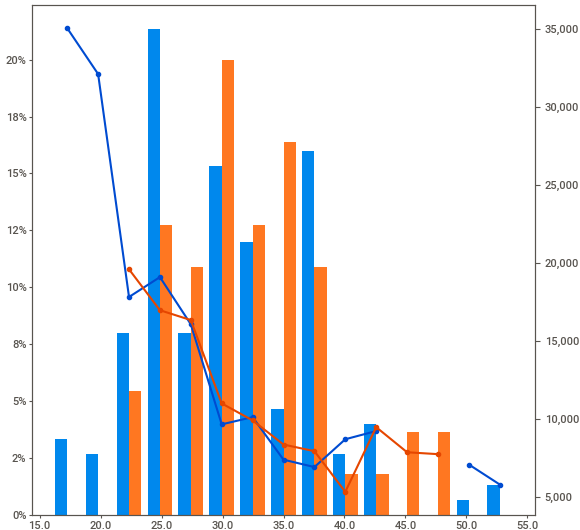
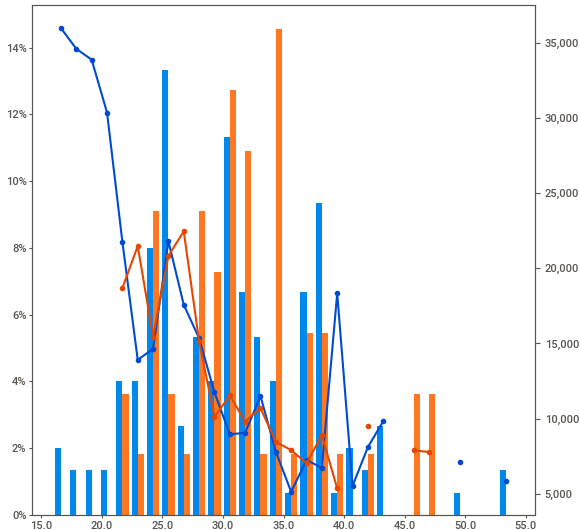
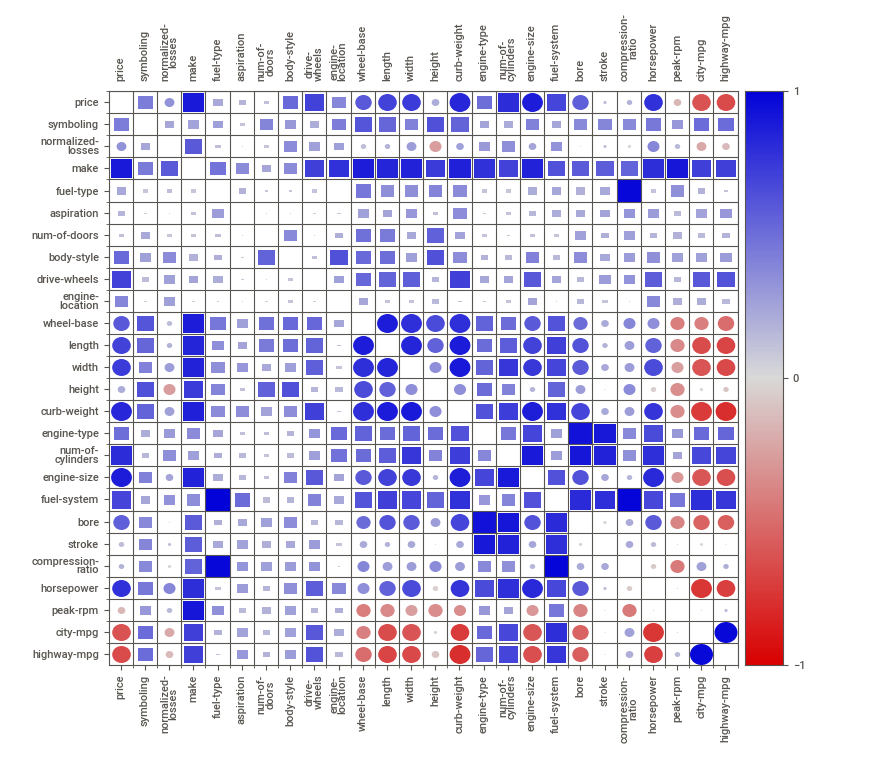
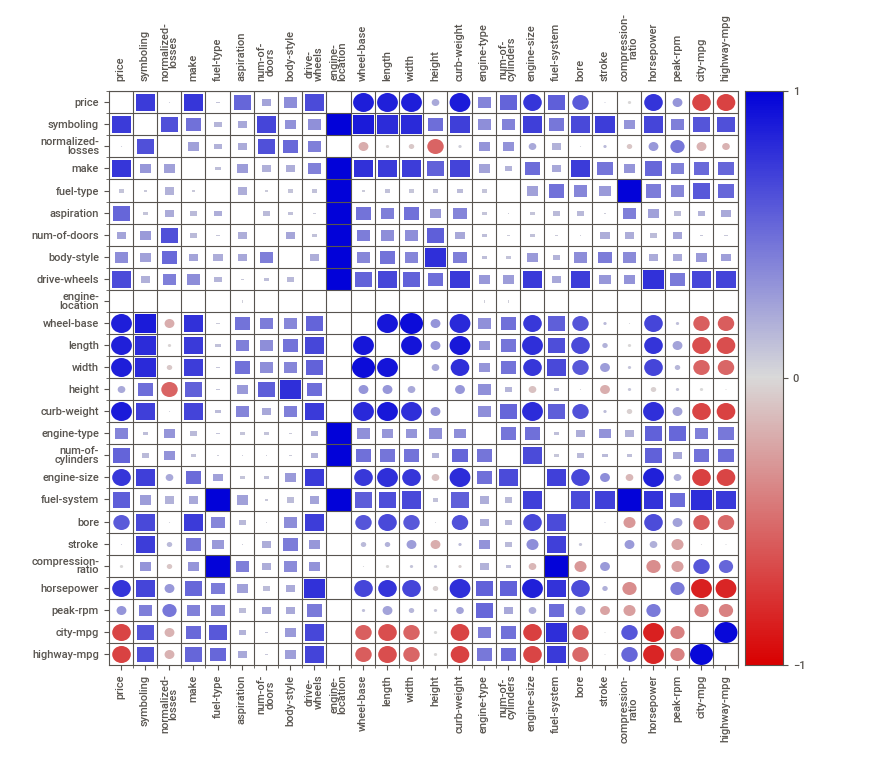

In [10]:
comparison_report.show_notebook()